# Анализ рынка видеоигр

Исследование заключается в анализе глобального рынка видеоигр за 2016 и более ранние годы для различных платформ. Данные взяты из открытых источников.

Целью проекта является выявление определяющих успешность игры закономерностей.

Анализ будет проводиться в несколько этапов:
1. Анализ продаж по годам
2. Анализ продаж в разрезе платформ и определение характерного срока жизни платформы
3. Определение актуального периода для прогнозирования продаж в будущие периоды
4. Анализ зависимости продаж от платформы, отзывов пользователей и критиков, жанра в рамках выбранного периода
5. Составление портрета пользователя для различных регионов (NA, EU, JP)
6. Проверка гипотез:
     1) Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
     2) Средние пользовательские рейтинги жанров Action и Sports разные

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st

In [2]:
#код для вывода нескольких значений в одной ячейке
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
#настроим отображение чисел float в десятичном формате с двумя знаками после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
# скроем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [5]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

Ознакомимся с данными:

In [6]:
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,"2,006.00",Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,"1,985.00",Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,"2,008.00",Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,"2,009.00",Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,"1,996.00",Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Мы видим названия столбцоы, написанные в различных регистрах. Необходимо привести их к единому нижнему регистру.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Следующие столбцы необходимо привести к нужному типу данных:

* Year_of_Release - к формату целых чисел

In [8]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,"16,446.00","16,715.00","16,715.00","16,715.00","16,715.00","8,137.00"
mean,"2,006.48",0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,"1,980.00",0.00,0.00,0.00,0.00,13.00
25%,"2,003.00",0.00,0.00,0.00,0.00,60.00
50%,"2,007.00",0.08,0.02,0.00,0.01,71.00
75%,"2,010.00",0.24,0.11,0.04,0.03,79.00
max,"2,016.00",41.36,28.96,10.22,10.57,98.00


Мы видим большое число записей, по которым количество продаж в различных регионах составляет 0 копий. Необходимо проанализировать данные значения.

In [9]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Необходимо проанализировать и при необходимости заполнить пропущенные значения.

In [10]:
df.duplicated().sum()

0

Полные дубликаты отсутствуют.

Мы изучили данные, на основе которых будем проводить исследование.

Мы обнаружили следующие проблемы:
1. Некорректные названия столбцов
2. Некорректные типы данных
3. Большое количество нулевых значений по продажам в различных регионах
4. Наличие пропущенных значений

Данные проблемы будут подробнее проанализированы и исправлены в следующем разделе.

## Подготовка данных

### Замена названий столбцов

Приведем названия столбцов к единому нижнему регистру.

In [11]:
#выведем названия столбцов
df.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [12]:
#переименуем столбцы

df.columns = df.columns.str.lower()

In [13]:
#проверка
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Расчет суммарных продаж

Рассчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [14]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

In [15]:
#выведем статистику по данному столбцу
df['total_sales'].describe()

df['total_sales'].sum()

count   16,715.00
mean         0.53
std          1.55
min          0.00
25%          0.06
50%          0.17
75%          0.47
max         82.54
Name: total_sales, dtype: float64

8915.71

Выведем записи с нулевыми общими продажами.

In [16]:
df[df['total_sales'] == 0.00]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16676,G1 Jockey 4 2008,PS3,"2,008.00",Sports,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00
16709,SCORE International Baja 1000: The Official Game,PS2,"2,008.00",Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN,0.00


Предположим, что продажи данных видеоигр были очень низки и при округлении значение составило 0. Оставим данные записи в датасете.

### Обработка пропусков

Повторно выведем информацию о пропущенных значениях:

In [17]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

Выведем значения с пропущенными данными в столбце name:

In [18]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,"1,993.00",NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,"1,993.00",NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


Ввиду большого количества пропусков в данных записях отбросим эти строки.

In [19]:
df = df.dropna(subset=['name'])

Обработаем значение tbd в столбце с оценкой пользователей.

In [20]:
#выведем записи, содержащие данные значения
df[df['user_score'] == 'tbd'].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,"2,010.00",Sports,3.45,2.59,0.00,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,"2,005.00",Misc,2.08,1.35,0.00,0.54,61.00,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,"2,011.00",Sports,1.51,1.03,0.00,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,"2,010.00",Misc,1.65,0.57,0.00,0.20,71.00,tbd,E,2.42
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.00,tbd,E,2.40


Данная аббревиатура означает "to be determined", т. е. "подлежит уточнению". Однако, т. к. мы видим игры с такой записью, выпущенные несколько лет назад, будем считать, что эти значения являются пропусками.

In [21]:
#заменим значения tbd на пропуски
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [22]:
#повторно выведем информацию о пропусках
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
total_sales           0
dtype: int64

Т. к. для анализа нам необходимы данные о рейтинге критиков и пользователей, а также о возрастном рейтинге и годе релиза, посчитаем, сколько продаж приходится на игры с пропусками в данных столбцах.

In [23]:
#создадим датафрейм со строками, где значение хотя бы по одному столбцу пропущено
df_missed_values = df[df.isna().any(axis=1)]

print('Всего строк с пропущенными значениями:', len(df_missed_values))

print('Количество проданных копий в таких строках, млн шт.:', df_missed_values['total_sales'].sum())

print('Доля проданных копий в таких строках, млн шт.:', 
      df_missed_values['total_sales'].sum() / df['total_sales'].sum())

Всего строк с пропущенными значениями: 9887
Количество проданных копий в таких строках, млн шт.: 3607.32
Доля проданных копий в таких строках, млн шт.: 0.40471251356121024


Т. к. доля продаж игр, в записях о которых отсутствует значение хотя бы по одному столбцу, составляет 40%, мы не можем отбросить данные значения. Однако, заполнение пропущенных данных в указанных столбцах на основе данных по другим играм может исказить результаты. Заполним пропуски значением unknown:

In [24]:
for column in ['critic_score', 'user_score','rating']:
    df[column].fillna('unknown', inplace=True)

Отдельно посчитаем долю продаж игр с пропусками в столбце year_of_release:

In [25]:
df_missed_year = df[df['year_of_release'].isna()]

print('Всего строк с пропущенными значениями года выпуска:', len(df_missed_year))

print('Количество проданных копий в таких строках, млн шт.:', df_missed_year['total_sales'].sum())

print('Доля проданных копий в таких строках, млн шт.:', 
      df_missed_year['total_sales'].sum() / df['total_sales'].sum())

Всего строк с пропущенными значениями года выпуска: 269
Количество проданных копий в таких строках, млн шт.: 98.91999999999999
Доля проданных копий в таких строках, млн шт.: 0.011098034508021166


Т. к. доля продаж с пропусками в данном столбце составляет около 1%, мы можем отбросить данные значения.

In [26]:
df = df.dropna(subset=['year_of_release'])

Выведем итоговые данные о пропусках:

In [27]:
df.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

### Изменение типов данных

Еще раз выведем информацию о типах столбцов в датафрейме:

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1.6+ MB


Приведем следующие столбцы к нужному типу данных:
* year_of_release - к формату целых чисел

In [29]:
df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.year

Проверим изменения:

In [30]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int32  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  object 
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(5), int32(1), object(6)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.00,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,unknown,unknown,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.00,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,unknown,unknown,unknown,31.38


### Вывод

В рамках подготовки данных к анализу мы произвели следующие изменения:
1. Привели названия столбцов к нижнему регистру
2. Создали дополнительный столбец total_sales, в котором рассчитали суммарные продажи по всем регионам
3. Обработали пропуски - отбросили записи с большим количеством пропусков, а также с пропусками в столбце год выпуска. Мы не заполняли пропущенные значения в столбцах с оценками пользователей и критиков, а также возрастным рейтингом, чтобы не исказить результаты исследования
4. Изменили типы данных, приведя их к нужному формату

## Исследовательский анализ данных

### Анализ продаж по годам

Проанализируем суммы продаж игр, выпущенных в различные годы.

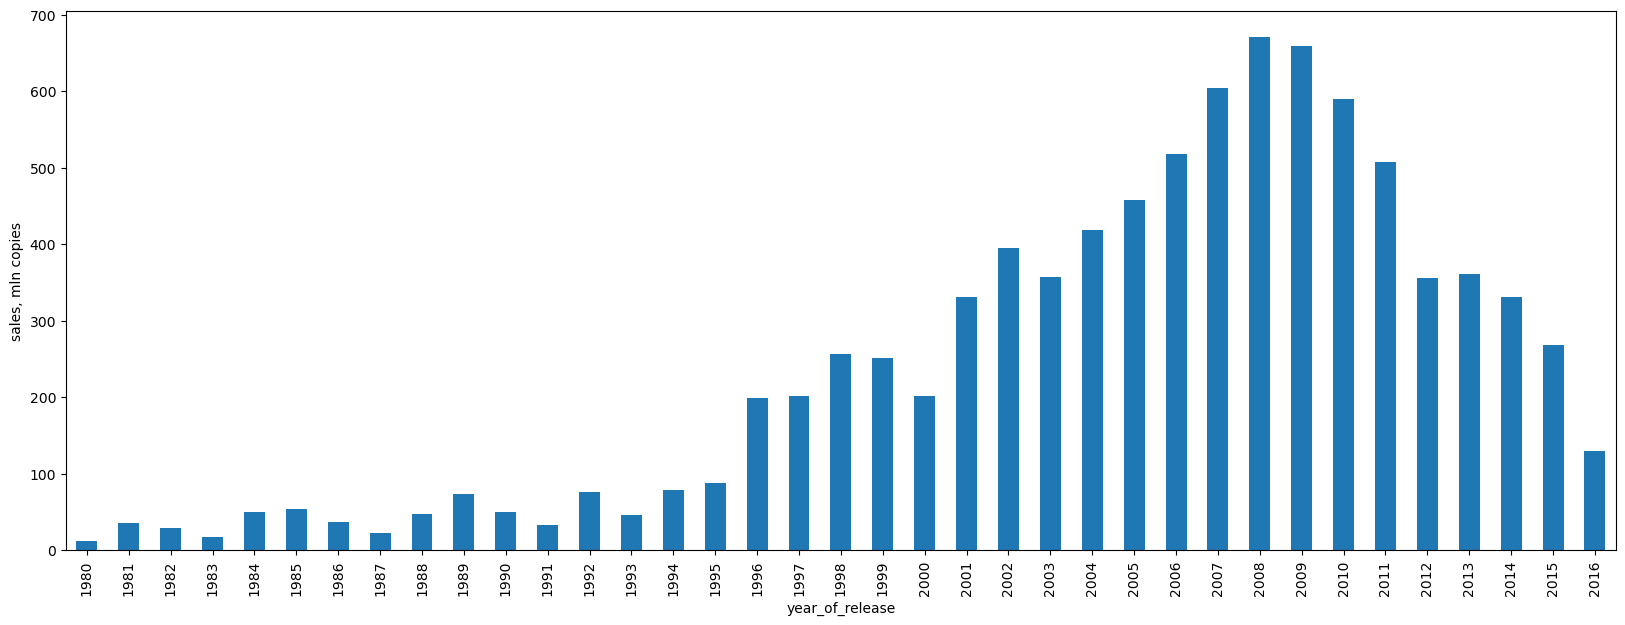

In [31]:
df.groupby(by='year_of_release')['total_sales'].sum().plot(kind='bar', figsize=(20,7),
                                                           ylabel='sales, mln copies');

Мы видим, что число продаж увеличивалось до 2008 года, после чего начало снижаться.

Число продаж до 1995 года не превышало 100 млн копий, в связи с чем эти данные могут быть нерелевантными для анализа будущих периодов.

### Анализ продаж по платформам

Проанализируем распределение продаж по различным платформам.

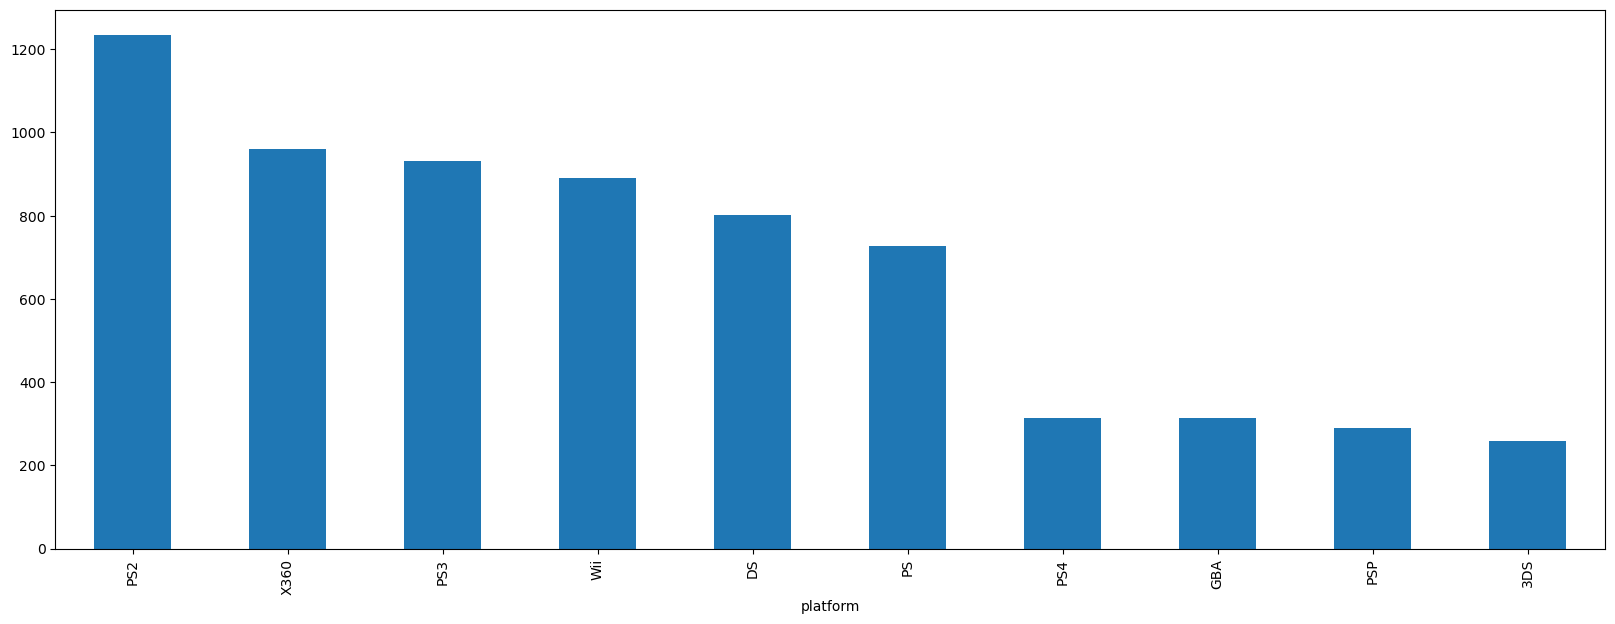

In [32]:
#создадим переменную с суммой продаж в разрезе платформ
grouped_platforms = df.groupby(by='platform')['total_sales'].sum()

#выведем топ-10 результатов за все время
grouped_platforms.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,7));

Наиболее популярными платформами являются PS2, X360, PS3, Wii, DS и PS.

___

Определим типичный срок жизни платформы на основе наиболее популярных платформ.

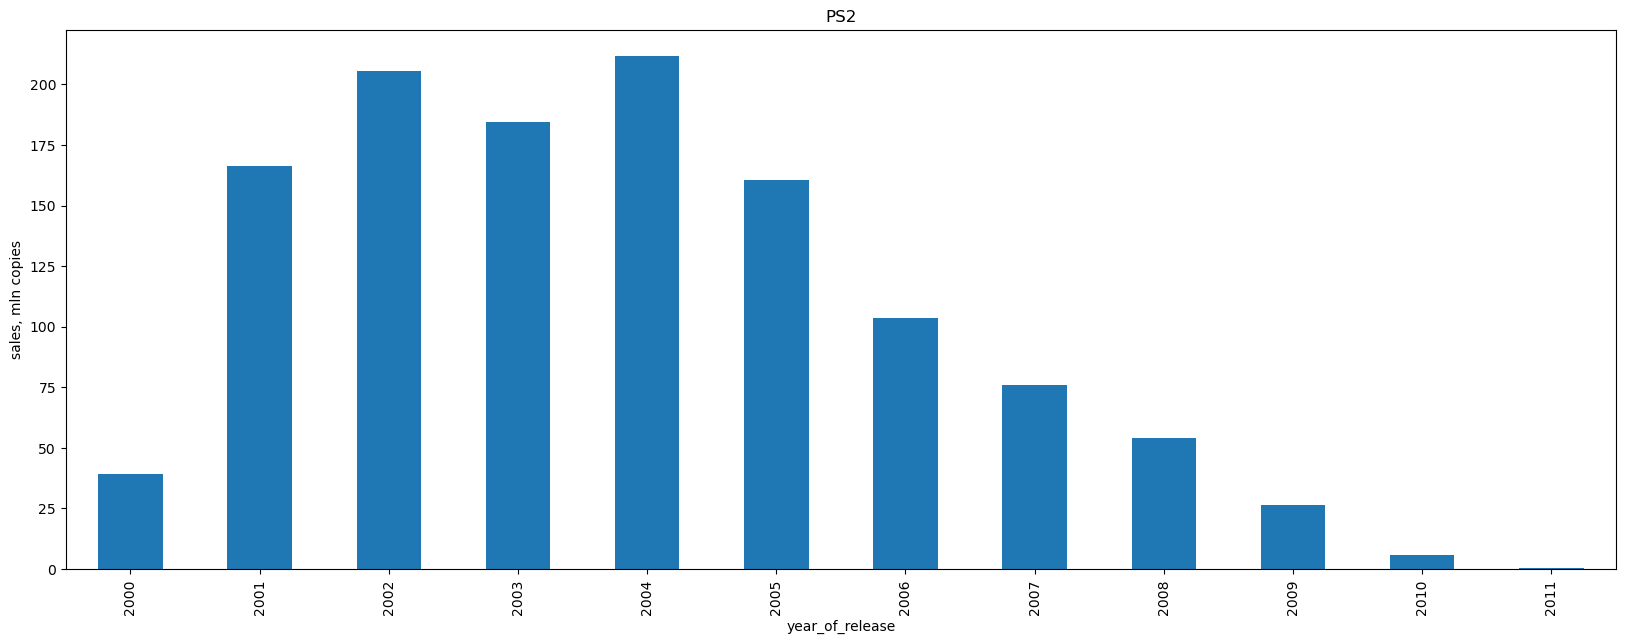

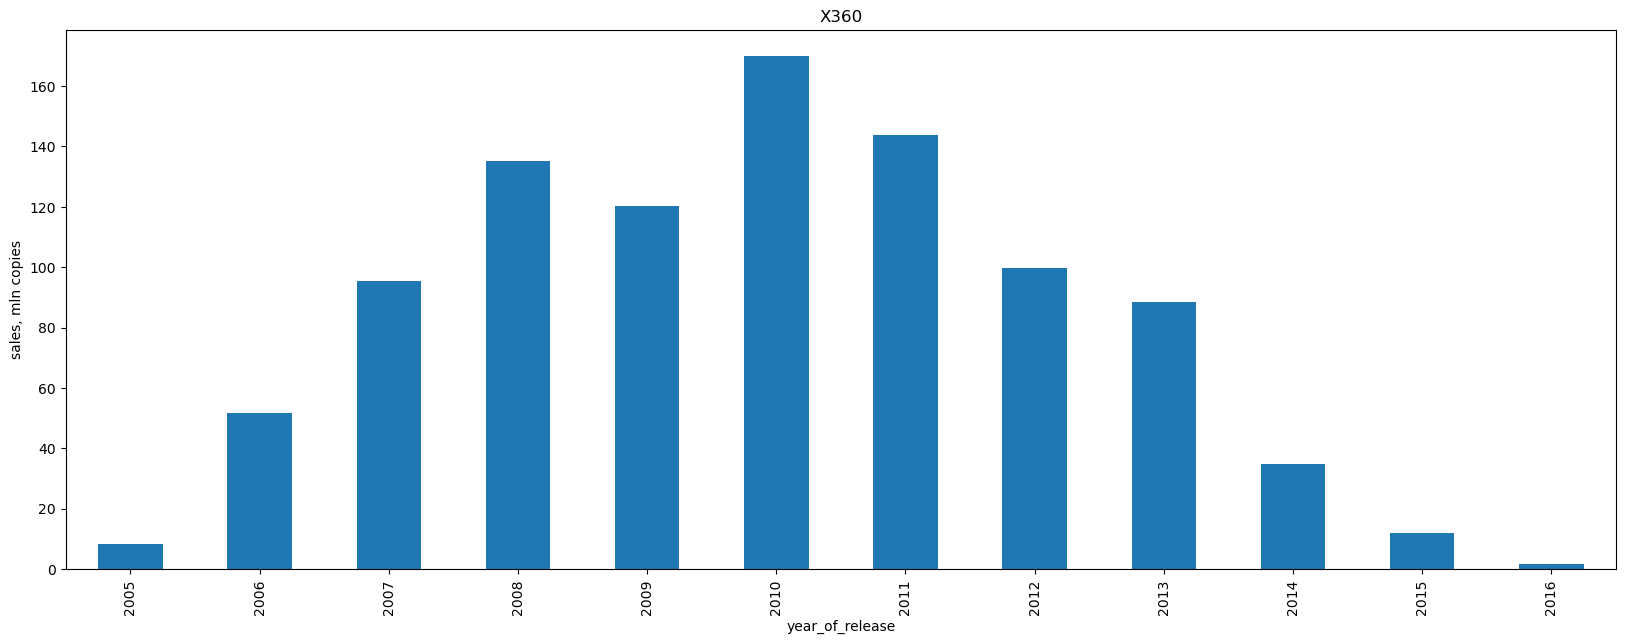

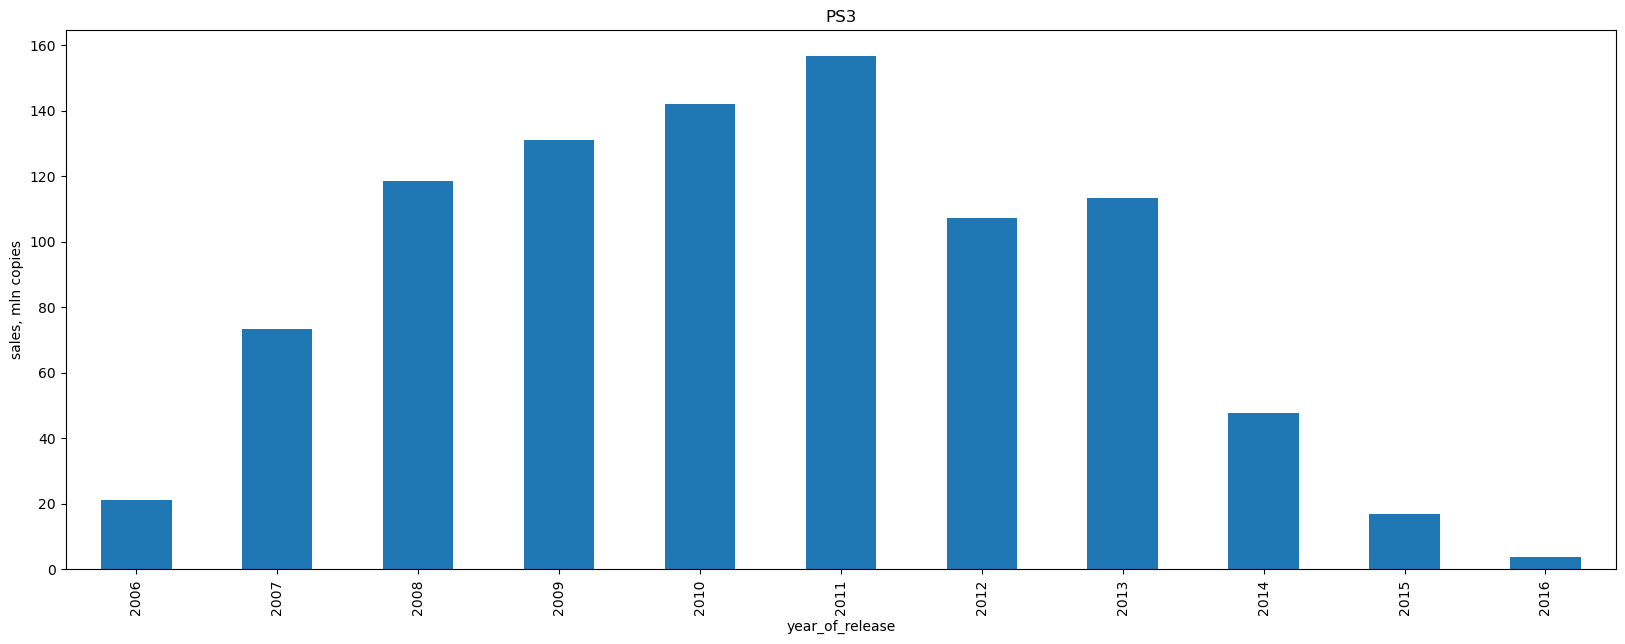

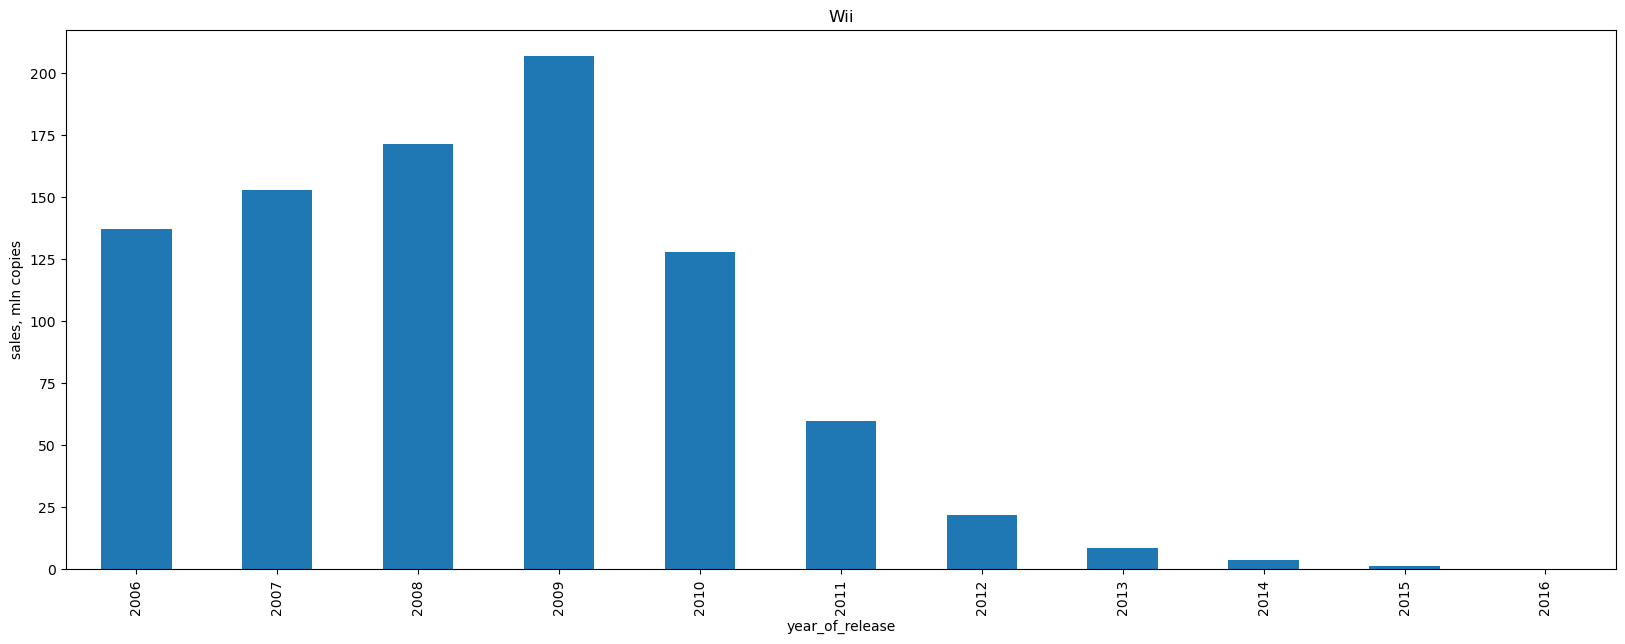

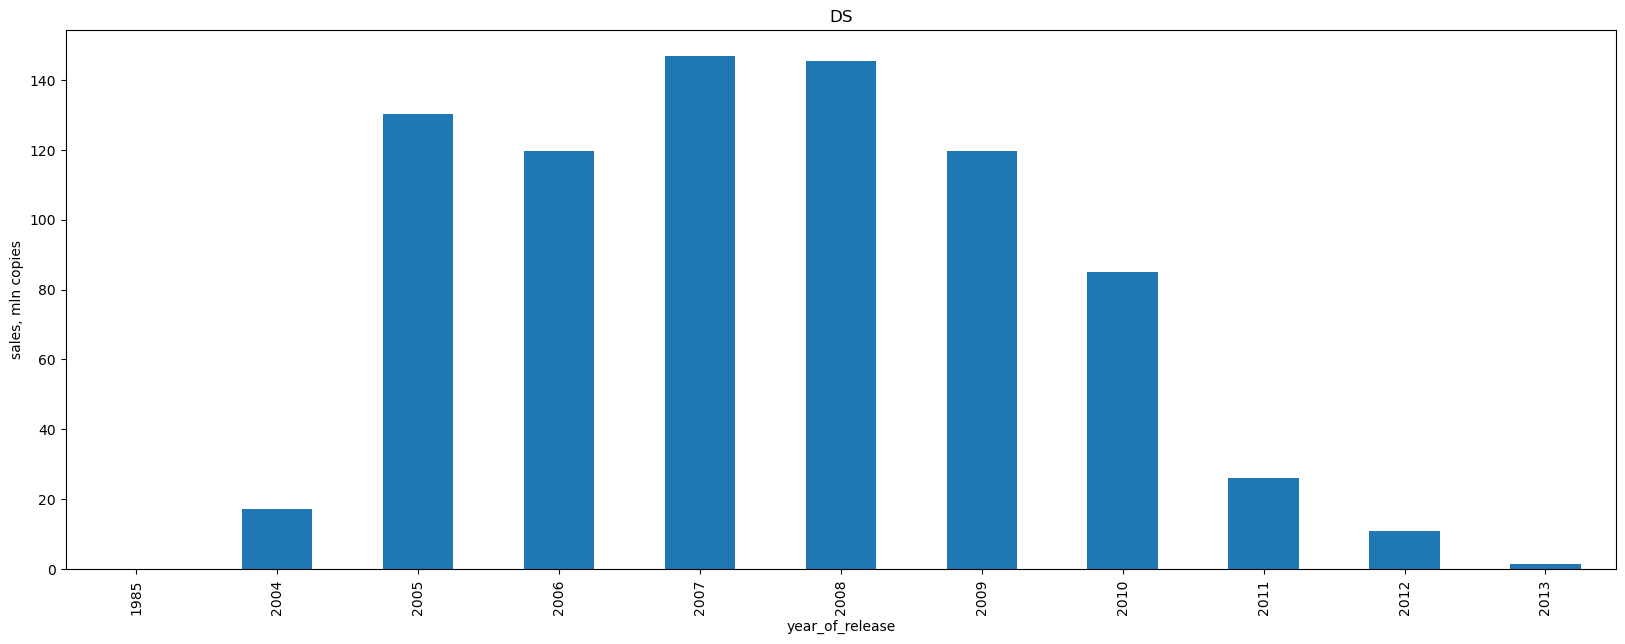

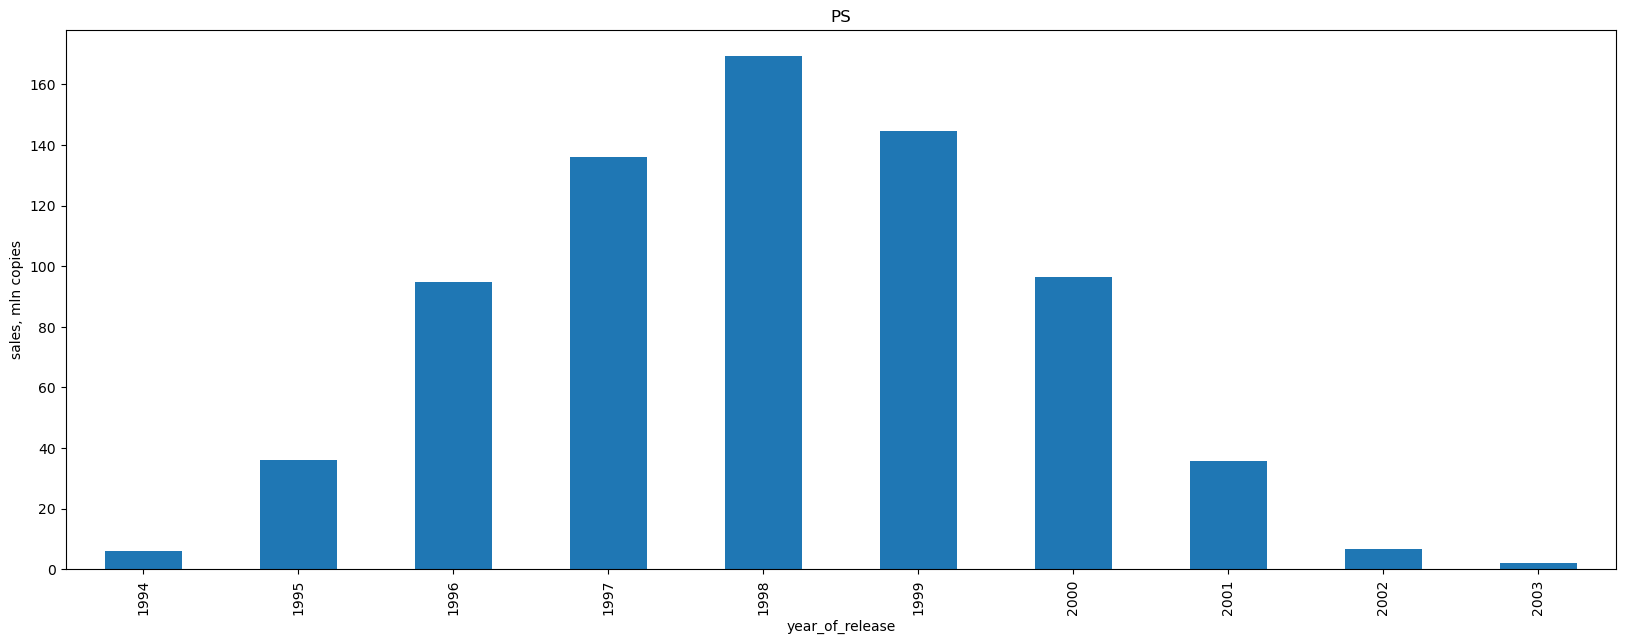

In [33]:
#создадим переменную с топ-6 платформами, определенными выше
top_platforms = grouped_platforms.sort_values(ascending=False).head(6).index

#выведем графики с распределением продаж по годам для каждой из этих платформ
for platform in top_platforms:
    graph = (df[df['platform'] == platform]
        .groupby(by='year_of_release')['total_sales']
        .sum()
        .plot(kind='bar', figsize=(20,7), title=platform, ylabel='sales, mln copies'));
    plt.show(graph);

Наиболее активный срок жизни:
1. PS2 - 2001-2008, 8 лет
2. X360 - 2006-2014, 9 лет
3. PS3 - 2007-2014, 8 лет
4. Wii - 2006-2011, 6 лет
5. DS - 2005-2010, 6 лет
6. PS - 1995-2001, 7 лет

In [34]:
print('Средний срок жизни платформы составляет', pd.Series([8, 9, 8, 6, 6, 7]).mean(), 'лет')

Средний срок жизни платформы составляет 7.333333333333333 лет


Для целей исследования будем считать срок жизни платформы равным 7 лет.

### Определение актуального периода

Дальнейшее исследование будем проводиться на данных за последние несколько лет, статистика по которым актуальна для прогнозирования продаж на последующие годы.

Актуальный срок рассчитаем как типичный срок жизни платформы минус 1 год (т. е. 6 лет). Так мы не будем учитывать данные по устаревшим платформам: в выборку попадут данные по всем платформам, появившимся за последние 6 лет, то есть актуальные для следующего года; а по платформам, появившимся 6 лет назад, мы предполагаем, что срок жизни в среднем составляет еще 1 год. Таким образом, благодаря тому, что распределение продаж по годам в разрезе платформ близко к нормальному, для прогноза будут учитываться усредненные значения за прошедшие годы, как низкие продажи в начале и конце срока жизни платформы, так и высокие в его середине.

In [35]:
#создадим датафрейм с данными по продажам за период с 2011 по 2016 год
df_actual = df[(df['year_of_release'] >= 2011) & (df['year_of_release'] <= 2016)]
#проверка
df_actual.groupby(by='year_of_release')['total_sales'].sum()

year_of_release
2011   507.58
2012   355.84
2013   361.24
2014   331.53
2015   267.98
2016   129.94
Name: total_sales, dtype: float64

Выведем основную информацию о полученном датасете:

In [36]:
df_actual.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int32  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     4022 non-null   object 
 9   user_score       4022 non-null   object 
 10  rating           4022 non-null   object 
 11  total_sales      4022 non-null   float64
dtypes: float64(5), int32(1), object(6)
memory usage: 392.8+ KB


### Анализ факторов, влияющих на продажи, в рамках выбранного периода

#### Зависимость продаж от платформы

Проанализируем количество продаж в разрезе платформ за выбранный актуальный период. Определим лидеров продаж, растущие и падающие платформы. Отберем перспективные для дальнейшего анализа.

In [37]:
#создадим переменную с суммой продаж в разрезе платформ
grouped_platforms_actual = df_actual.groupby(by='platform')['total_sales'].sum()

#выведем продажи по платформам по убыванию
grouped_platforms_actual.sort_values(ascending=False)

platform
PS3    445.57
X360   380.38
PS4    314.14
3DS    257.81
XOne   159.32
PC      97.68
Wii     95.02
WiiU    82.19
PSV     53.81
DS      38.73
PSP     29.01
PS2      0.45
Name: total_sales, dtype: float64

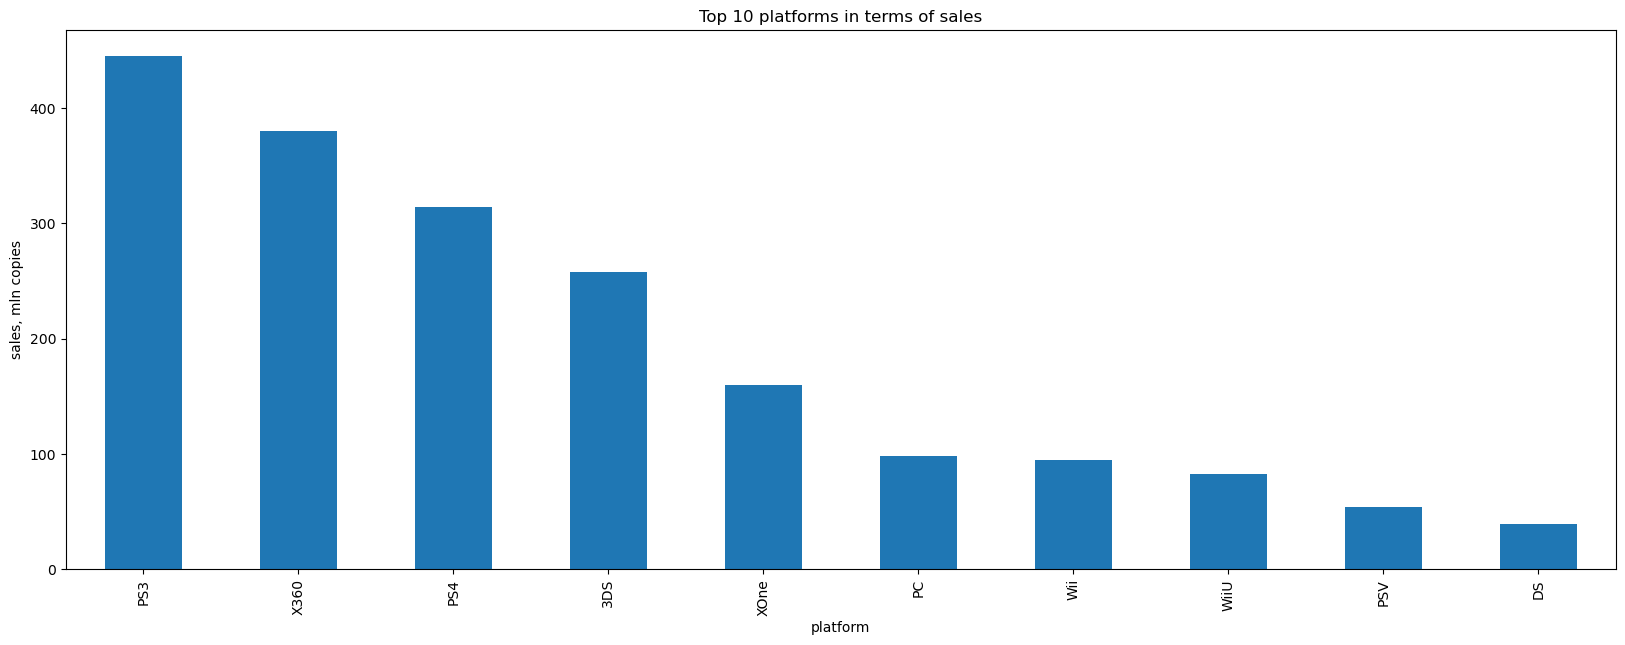

In [38]:
#выведем топ-10
grouped_platforms_actual.sort_values(ascending=False).head(10).plot(kind='bar', figsize=(20,7),
                                                                   ylabel='sales, mln copies',
                                                                   title='Top 10 platforms in terms of sales');

Построим распределение по годам по данным платформам:

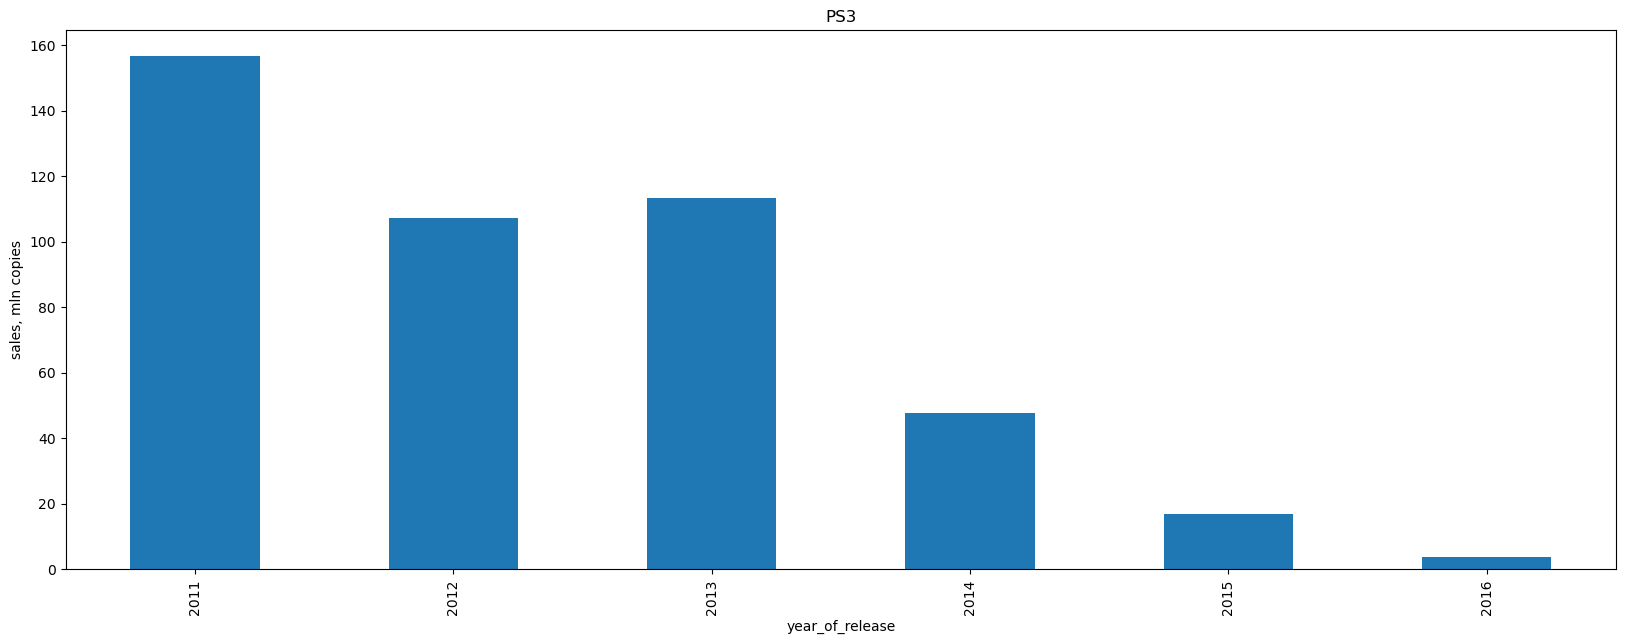

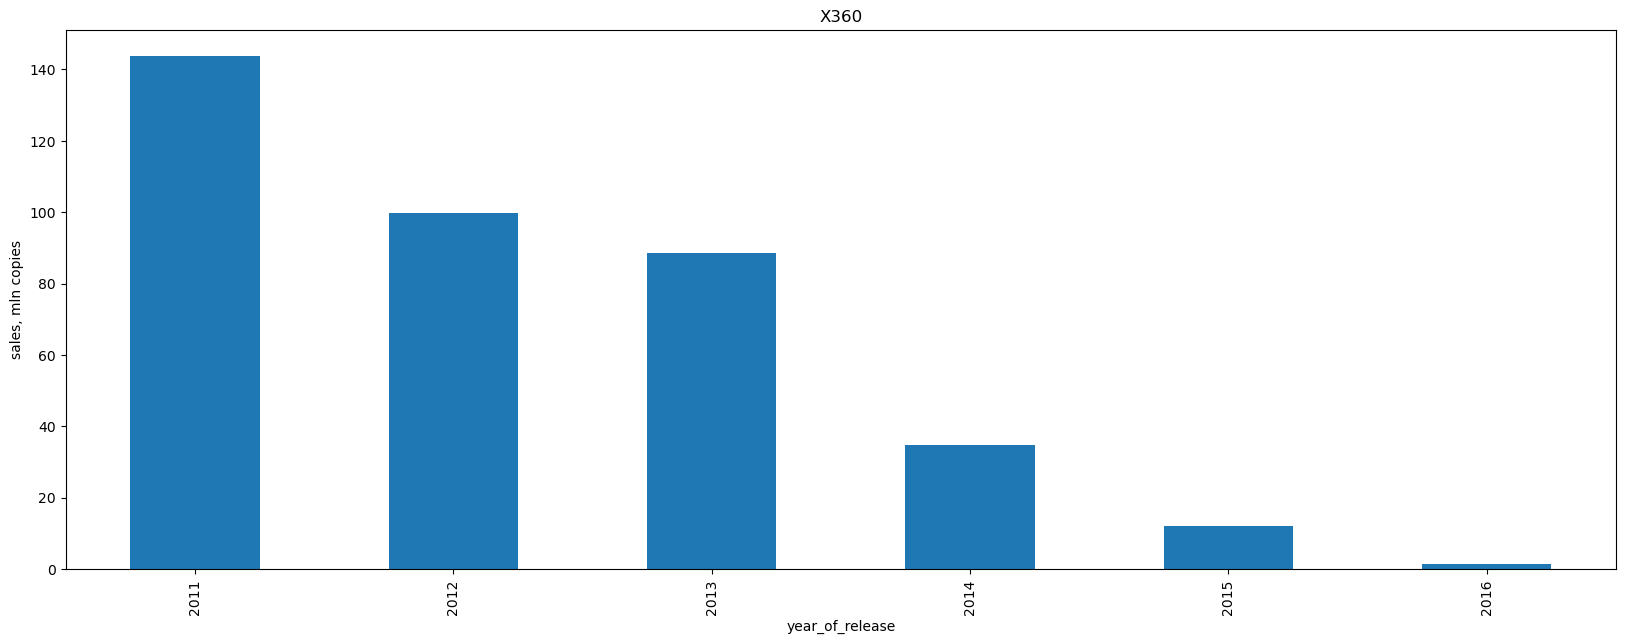

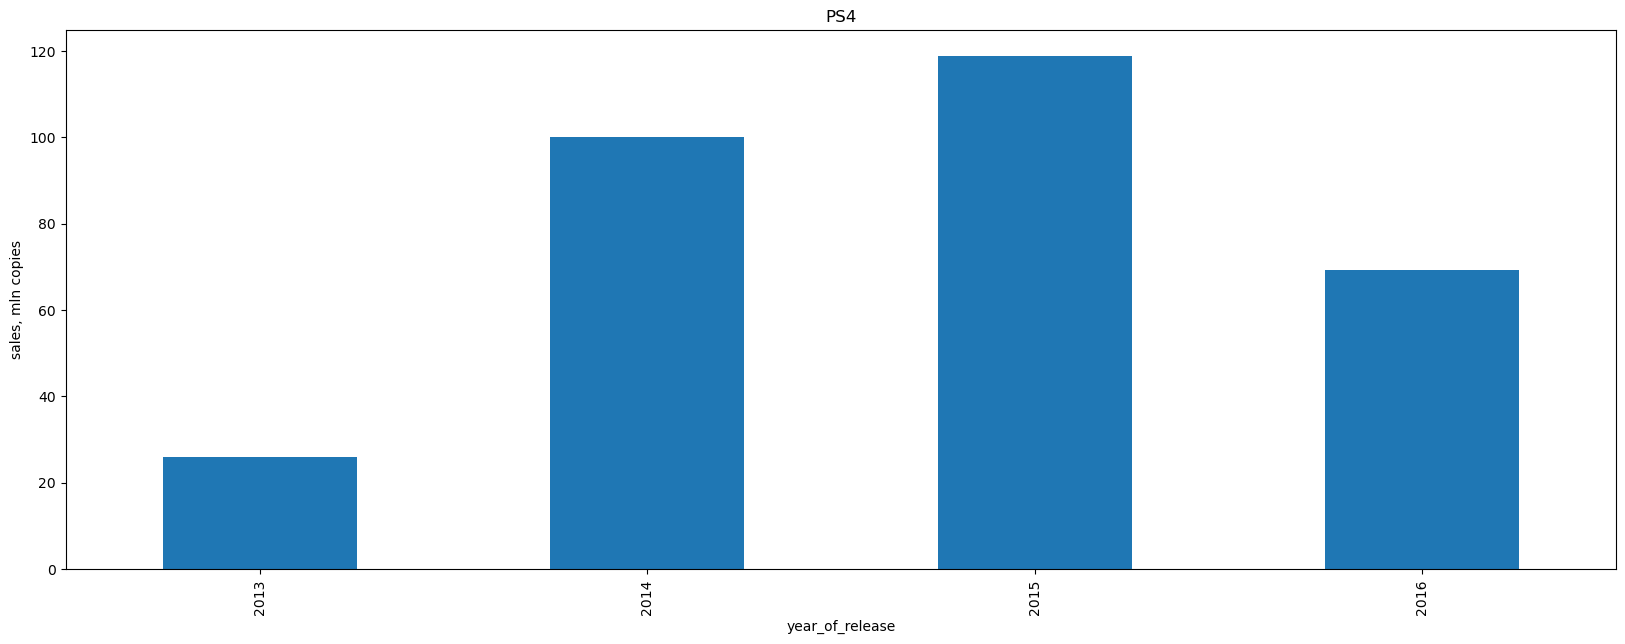

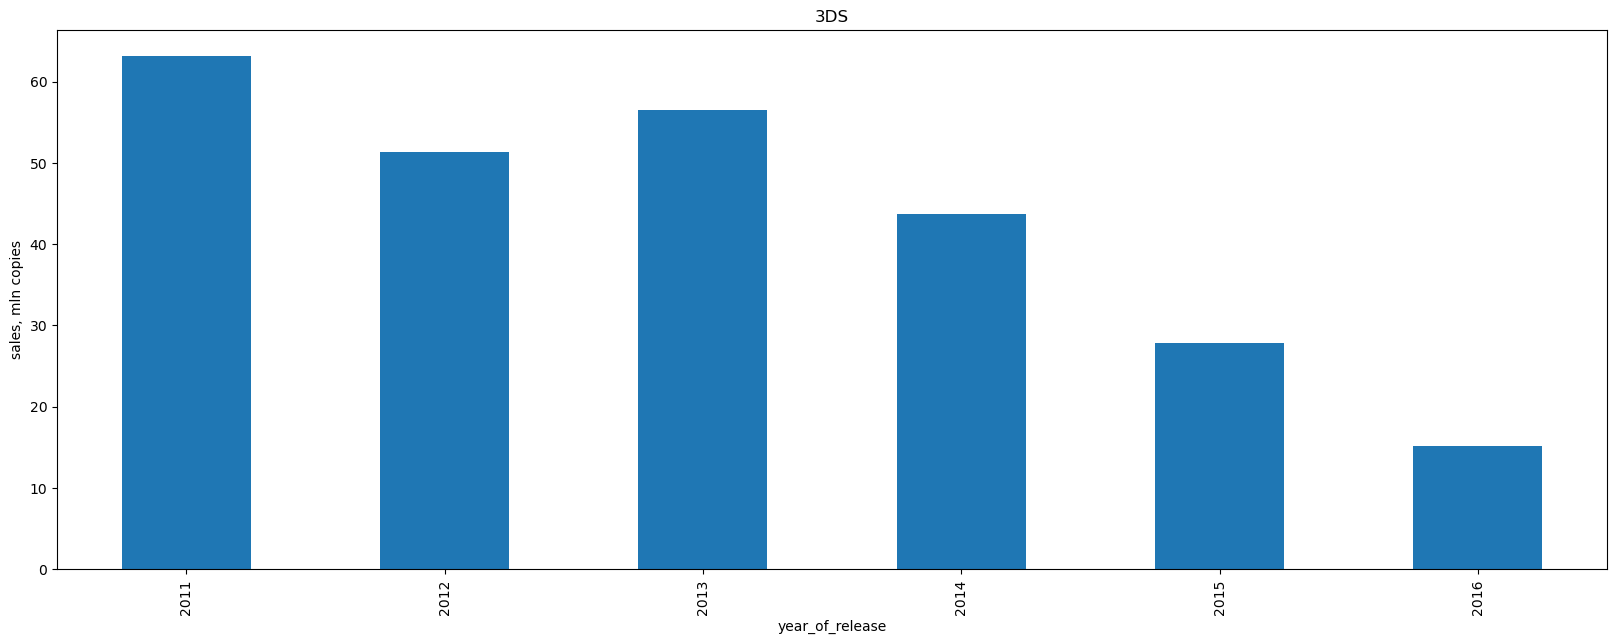

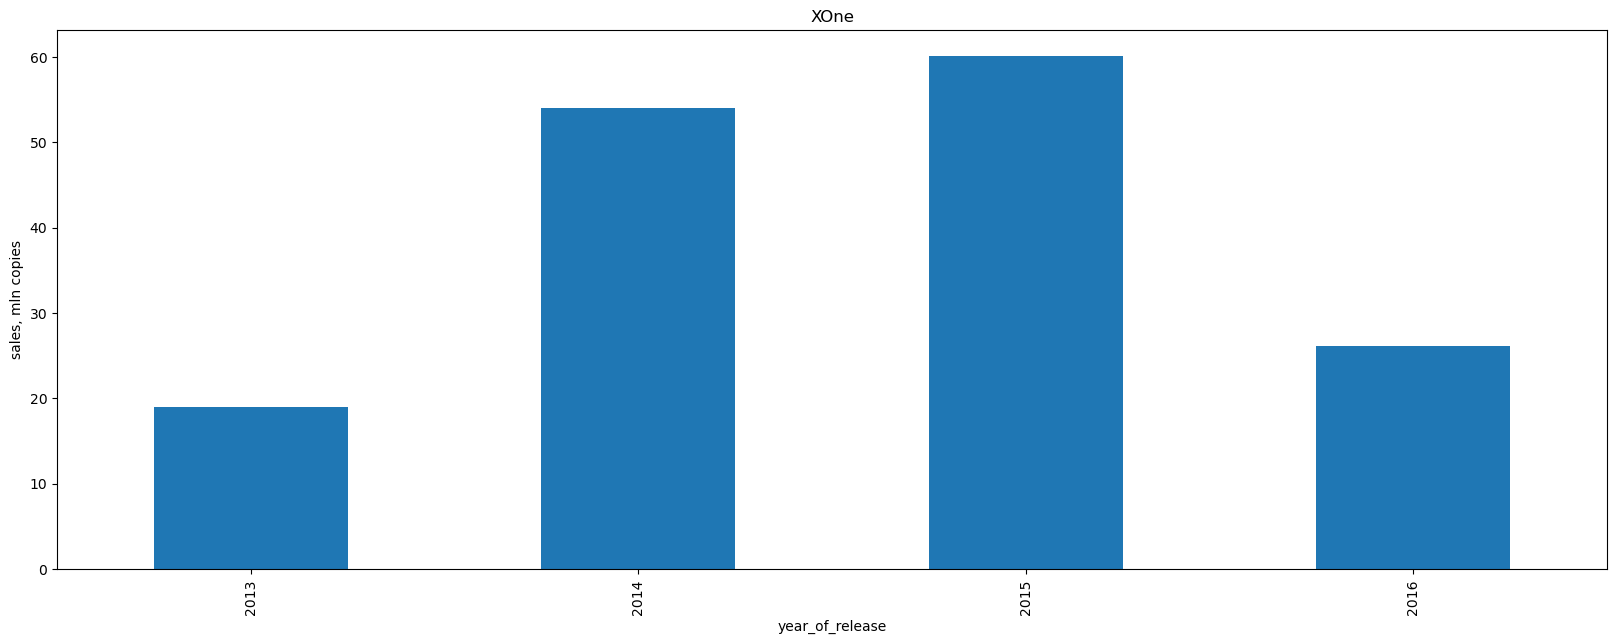

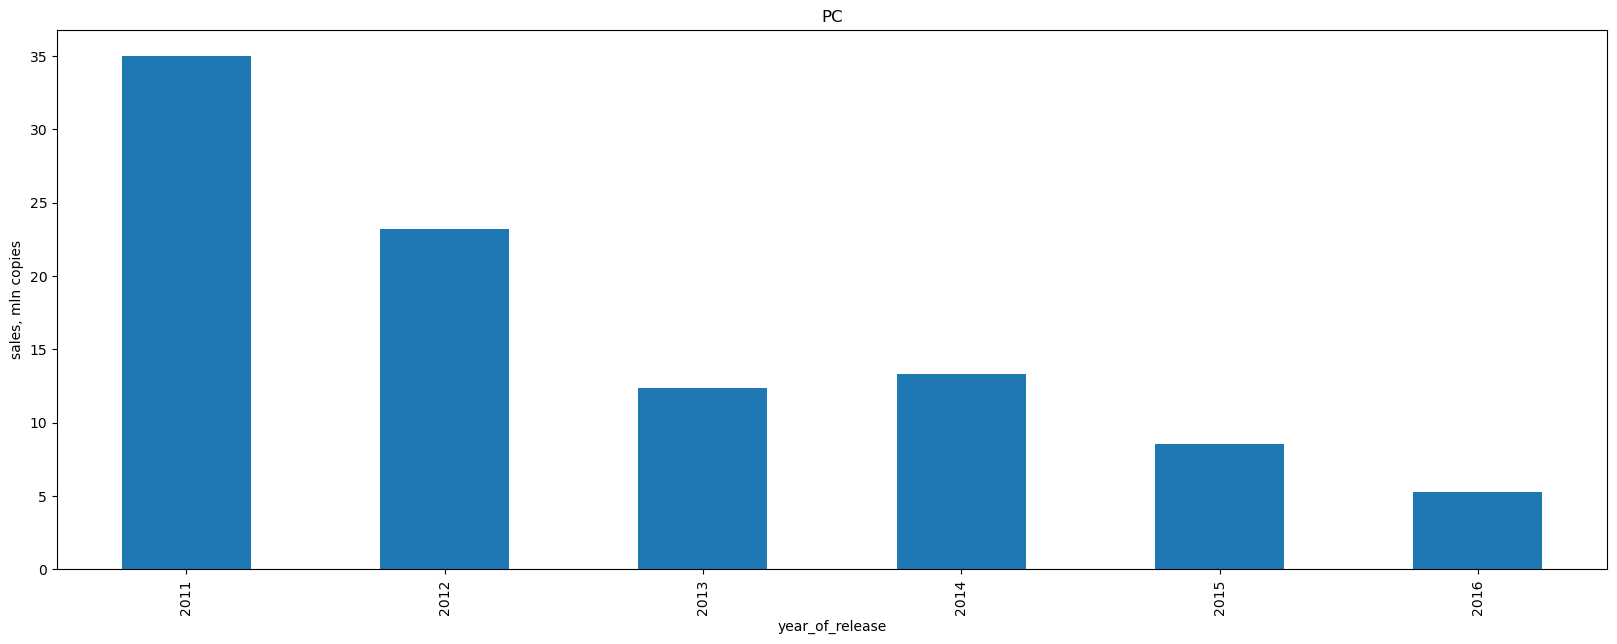

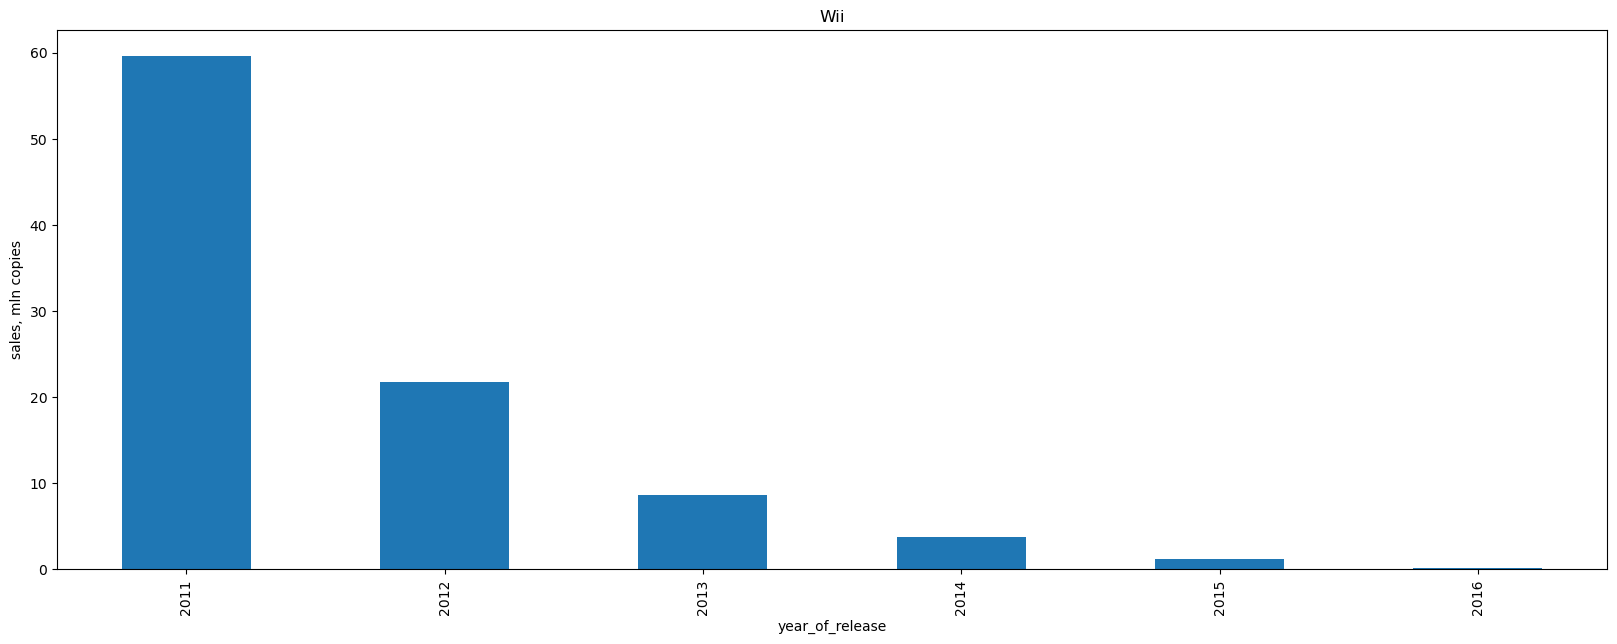

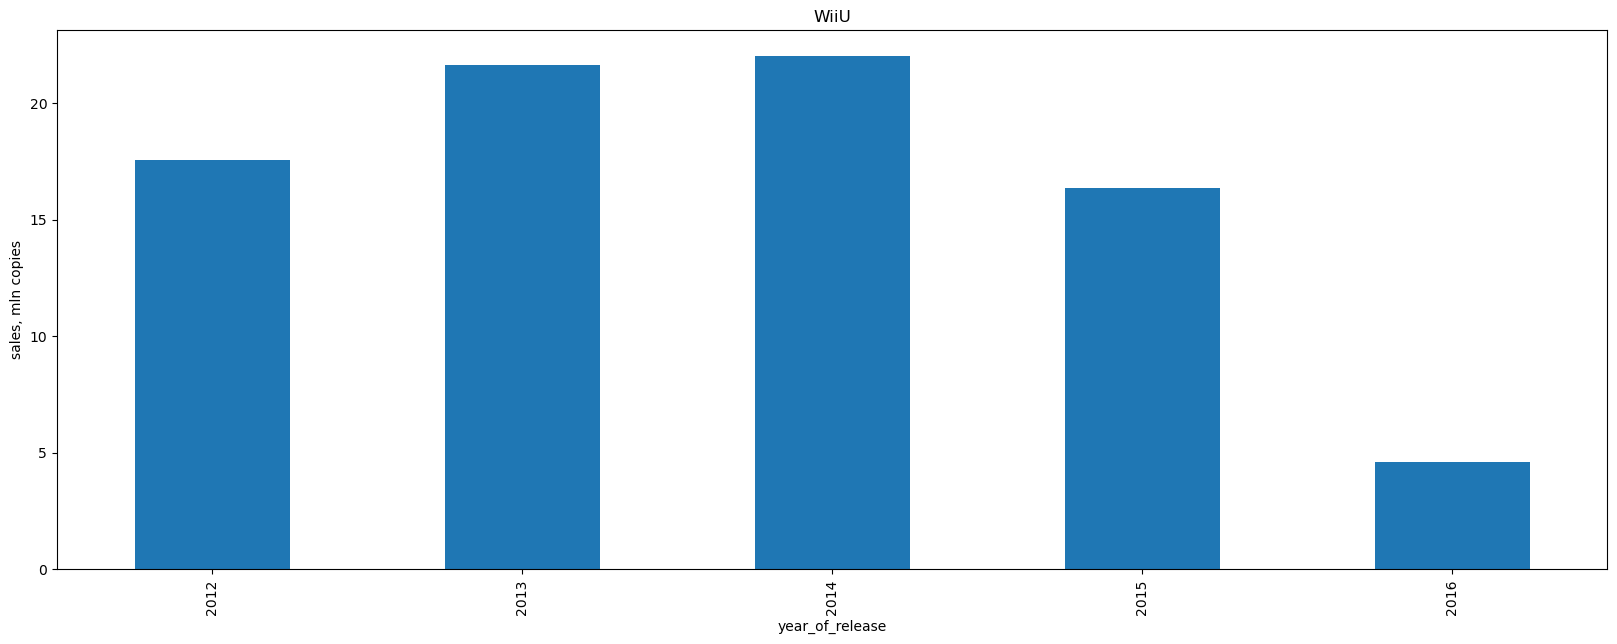

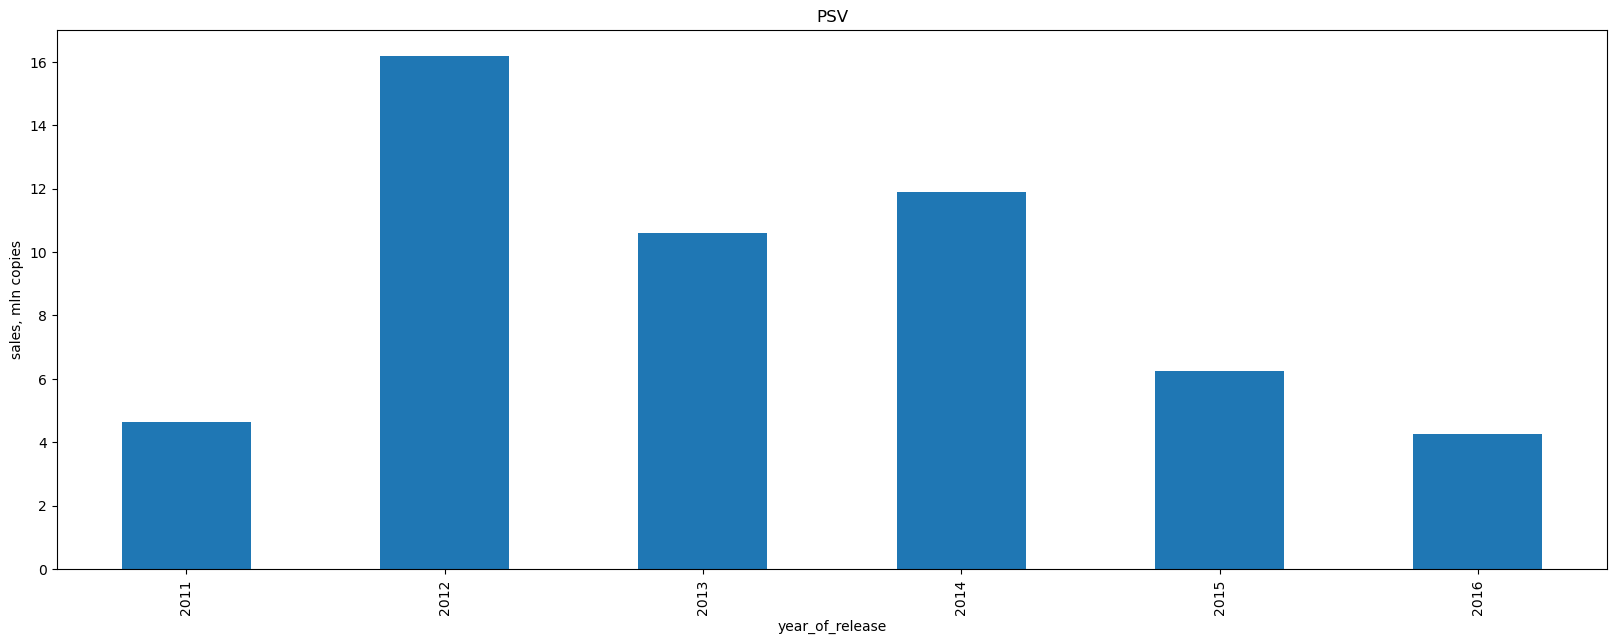

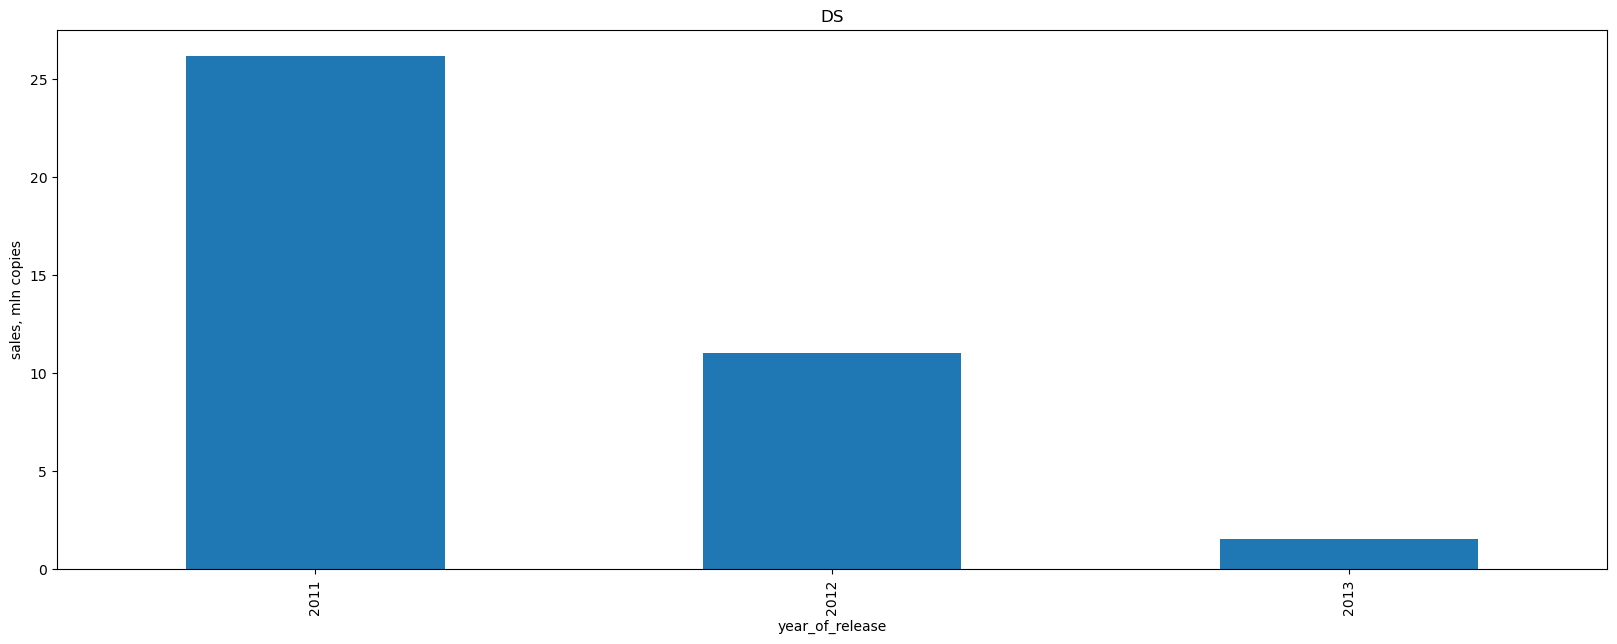

In [39]:
#создадим переменную с топ-10 платформами
top_platforms_actual = grouped_platforms_actual.sort_values(ascending=False).head(10).index

#выведем графики с распределением продаж по годам для каждой из этих платформ
for platform in top_platforms_actual:
    graph = (df_actual[df_actual['platform'] == platform]
        .groupby(by='year_of_release')['total_sales']
        .sum()
        .plot(kind='bar', figsize=(20,7), title=platform, ylabel='sales, mln copies'));
    plt.show(graph);

Наиболее перпективными платформами, которые можно использовать для анализа продаж в последующие годы можно считать PS4, XOne и PC (который хоть и имеет невысокие продажи, но является достаточно стабильной платформой).

PS3, X360 и 3DS хоть и имеют наибольшие суммарные продажи, но в период 2014-2016 годы продажи на этих платформах резко снижаются, что не позволяет говорить об их перспективности в будущих периодах.

Продажи игр на прочих платформах также снижаются и их суммарное значение невелико.

In [40]:
#сохраним выбранные платформы в отдельный датасет
df_actual_platforms = df_actual[df_actual['platform'].isin(['PS4', 'XOne', 'PC'])]

#проверка
df_actual_platforms.head()
df_actual_platforms.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,unknown,unknown,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.00,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.00,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,unknown,unknown,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.00,5.7,M,7.66


<class 'pandas.core.frame.DataFrame'>
Index: 1028 entries, 31 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1028 non-null   object 
 1   platform         1028 non-null   object 
 2   year_of_release  1028 non-null   int32  
 3   genre            1028 non-null   object 
 4   na_sales         1028 non-null   float64
 5   eu_sales         1028 non-null   float64
 6   jp_sales         1028 non-null   float64
 7   other_sales      1028 non-null   float64
 8   critic_score     1028 non-null   object 
 9   user_score       1028 non-null   object 
 10  rating           1028 non-null   object 
 11  total_sales      1028 non-null   float64
dtypes: float64(5), int32(1), object(6)
memory usage: 100.4+ KB


Посмотрим на распределение продаж по играм по отобранным платформам:

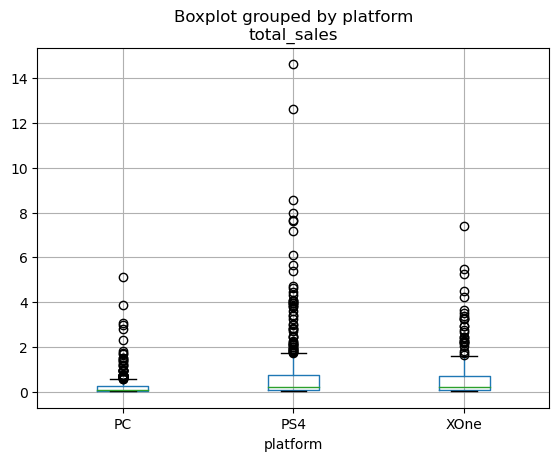

In [41]:
graph = df_actual_platforms.boxplot('total_sales', by='platform')
plt.show(graph)

Мы видим большое количество выбросов на диаграммах рассеяния, что говорит о том, что в среднем игры продаются небольшими тиражами, однако есть проекты (и их число достаточно велико), продажи которых существенно превышают медианные значения. Дополнительно вызовем метод describe:

In [42]:
df_actual_platforms['total_sales'].describe()

count   1,028.00
mean        0.56
std         1.18
min         0.01
25%         0.04
50%         0.14
75%         0.50
max        14.63
Name: total_sales, dtype: float64

Мы видим, что среднее существенно превышает медиану, что говорит о существенной скошенности датасета вправо. Также 75-й процентиль представлен продажами на уровне всего полмиллиона копий, в то время как максимальные продажи одной игры в рамках одной платформы составляют 14.63 млн копий. Стандартное отклонение также достаточно высоко и превышает среднее значение.

#### Зависимость продаж от отзывов

Проанализируем, как влияют на продажи в разрезе платформ отзывы пользователей и критиков.

##### PS4

Рассмотрим зависимость на примере PS4.

In [43]:
#удалим из датафрейма записи с пропущенными значениями по столбцам отзывов
df_ratings = (df_actual_platforms[
    (df_actual_platforms['critic_score'] != 'unknown') & 
    (df_actual_platforms['user_score'] != 'unknown')])

#переведем значения столбцов в нужный формат
df_ratings['critic_score'] = pd.to_numeric(df_ratings['critic_score'])
df_ratings['user_score'] = pd.to_numeric(df_ratings['user_score'])

df_ratings_PS4 = df_ratings[df_ratings['platform'] == 'PS4']

In [44]:
#категоризируем оценки критиков
df_ratings_PS4['critic_score_bin'] = pd.cut(df_ratings_PS4['critic_score'],5)

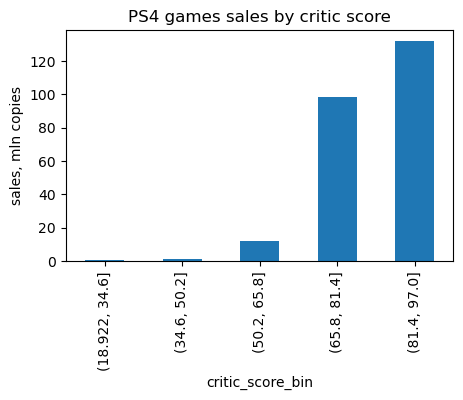

In [45]:
#выведем график распределения количества проданных игр в различных диапазонах оценки критиков
(df_ratings_PS4
    .groupby(by='critic_score_bin')['total_sales']
    .sum()
    .plot(kind='bar', figsize=(5, 3), ylabel='sales, mln copies', title='PS4 games sales by critic score'));

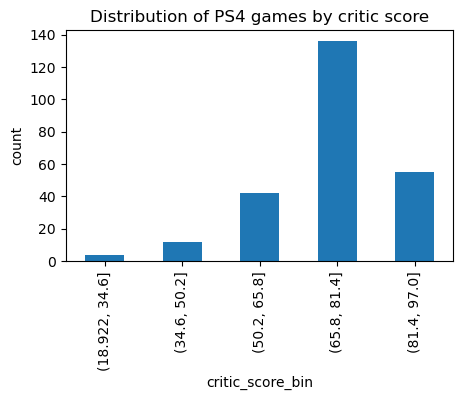

In [46]:
#выведем график частоты распределения оценок критиков в различных диапазонах
df_ratings_PS4.groupby(by='critic_score_bin')['critic_score'].count().plot(
                                                            kind='bar', figsize=(5, 3), ylabel='count', 
                                                            title='Distribution of PS4 games by critic score');

Рассчитаем корреляцию между продажами и оценками критиков. Построим корреляцию по методу Спирмена, т. к. он лучше обрабатывает выбросы, которых, как мы видели на диаграммах рассеяния выше, достаточно много

In [47]:
df_ratings_PS4['critic_score'].corr(df_ratings_PS4['total_sales'], method='spearman')

0.5078289176410228

Из графиков видно, что наибольшее количество игр на PS4 получает оценки критиков в диапазоне от 65.8 до 81.4, в то время как наибольшие продажи приходятся на игры с оценками критиков в диапазоне от 81.4 до 97, хотя такие оценки получает меньшее количество проектов.

Таким образом мы можем сделать вывод, что игры на PS4 с более высокими оценками критиков продаются в большем количестве копий. Вместе с тем корреляция носит умеренный характер, что можно оценить по небольшому коэффициенту корреляции (51%).

In [48]:
#категоризируем оценки пользователей
df_ratings_PS4['user_score_bin'] = pd.cut(df_ratings_PS4['user_score'],5)

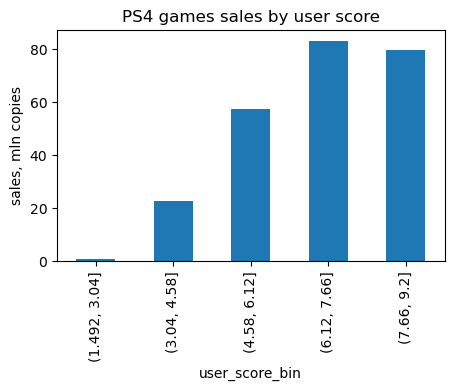

In [49]:
#выведем график распределения количества проданных игр в различных диапазонах оценки пользователей
(df_ratings_PS4
    .groupby(by='user_score_bin')['total_sales']
    .sum()
    .plot(kind='bar', figsize=(5, 3), ylabel='sales, mln copies', title='PS4 games sales by user score'));

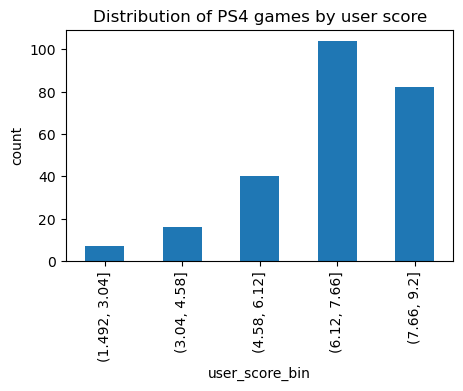

In [50]:
#выведем график частоты распределения оценок пользователей в различных диапазонах
df_ratings_PS4.groupby(by='user_score_bin')['critic_score'].count().plot(
                                                            kind='bar', figsize=(5, 3), ylabel='count', 
                                                            title='Distribution of PS4 games by user score');

Рассчитаем корреляцию между продажами и оценками пользователей. Построим корреляцию по методу Спирмена, т. к. он лучше обрабатывает выбросы, которых, как мы видели на диаграммах рассеяния выше, достаточно много

In [51]:
df_ratings_PS4['user_score'].corr(df_ratings_PS4['total_sales'], method='spearman')

-0.032430263114838286

Из графиков выше можно сделать вывод, что связь между количеством продаж игры и оценками пользователей отсутствует (коэффициент корреляции близок к нулю), на графиках доля продаж игр с оценками пользователей от 4.58 до 6.12 превышает долю игр с такими оценками.

___

Проведем аналогичный анализ по продажам на XOne и PC.

In [52]:
#передадим проведенные выше операции по оценкам критиков в функцию

def critic_scores_to_sales_corr (df, platform, bins_num, corr_method):
    df_platform = df[df['platform'] == platform]
    #категоризируем оценки критиков
    df_platform['critic_score_bin'] = pd.cut(df_platform['critic_score'],bins_num) 
    
    #выведем график распределения количества проданных игр в различных диапазонах оценки критиков
    (df_platform
    .groupby(by='critic_score_bin')['total_sales']
    .sum()
    .plot(kind='bar', figsize=(5, 3), ylabel='sales, mln copies', 
          title=f'{platform} games sales by critic score'));
    plt.show();
    
    #выведем график частоты распределения оценок критиков в различных диапазонах
    (df_platform.groupby(by='critic_score_bin')['critic_score']
                 .count().plot(kind='bar', figsize=(5, 3), ylabel='count', 
                               title=f'Distribution of {platform} games by critic score'));
    plt.show();

    #рассчитаем корреляцию
    corr = df_platform['critic_score'].corr(df_platform['total_sales'], method=corr_method)
    
    print('Корреляция оценок критиков и продаж по платформе', platform, 'составляет', corr)

In [53]:
#напишем аналогичную функцию для оценок пользователей

def user_scores_to_sales_corr (df, platform, bins_num, corr_method):
    df_platform = df[df['platform'] == platform]
    #категоризируем оценки пользователей
    df_platform['user_score_bin'] = pd.cut(df_platform['user_score'],bins_num) 
    
    #выведем график распределения количества проданных игр в различных диапазонах оценки пользователей
    (df_platform
    .groupby(by='user_score_bin')['total_sales']
    .sum()
    .plot(kind='bar', figsize=(5, 3), ylabel='sales, mln copies', title=f'{platform} games sales by user score'));
    plt.show();
    
    #выведем график частоты распределения оценок пользователей в различных диапазонах
    (df_platform
    .groupby(by='user_score_bin')['user_score'].count().plot(kind='bar', figsize=(5, 3), ylabel='count', 
                                                                 title=f'{platform} games by user score'));
    plt.show();

    #рассчитаем корреляцию
    corr = df_platform['user_score'].corr(df_platform['total_sales'], method=corr_method)
    
    print('Корреляция оценок критиков и продаж по платформе', platform, 'составляет', corr)

##### XOne

Проведем анализ для платформы XOne:

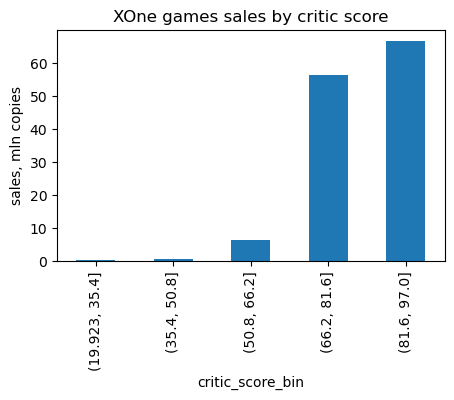

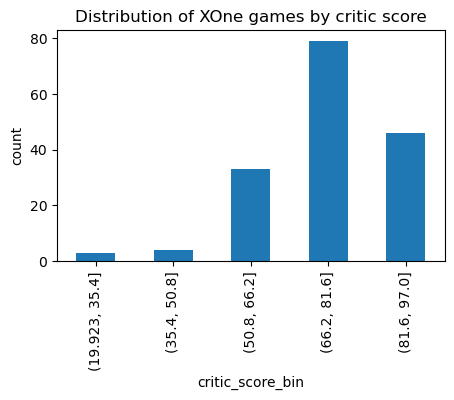

Корреляция оценок критиков и продаж по платформе XOne составляет 0.5162559802537015


In [54]:
critic_scores_to_sales_corr(df_ratings, 'XOne', bins_num=5, corr_method='spearman')

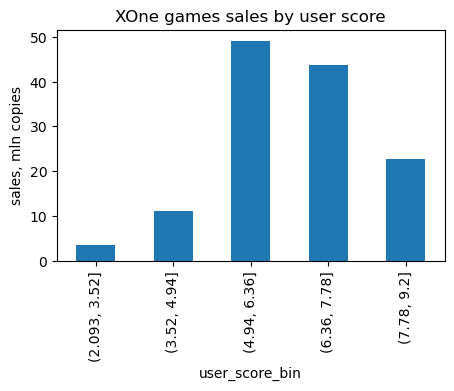

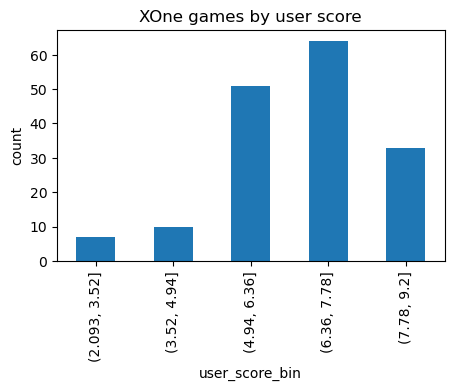

Корреляция оценок критиков и продаж по платформе XOne составляет -0.12204058571597955


In [55]:
user_scores_to_sales_corr(df_ratings, 'XOne', bins_num=5, corr_method='spearman')

##### PC

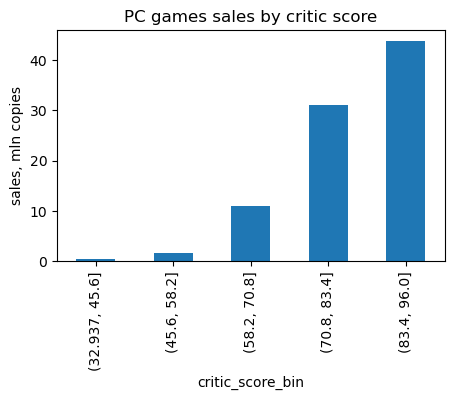

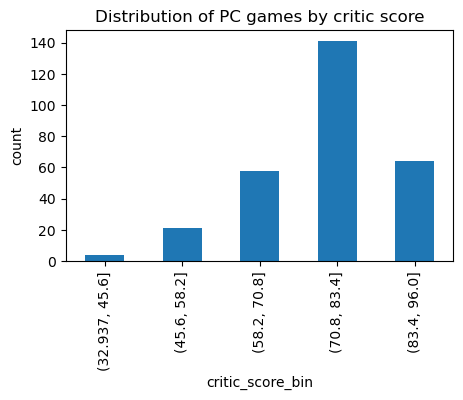

Корреляция оценок критиков и продаж по платформе PC составляет 0.4528818618730306


In [56]:
critic_scores_to_sales_corr(df_ratings, 'PC', bins_num=5, corr_method='spearman')

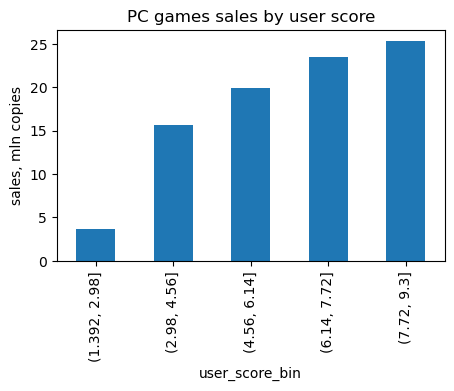

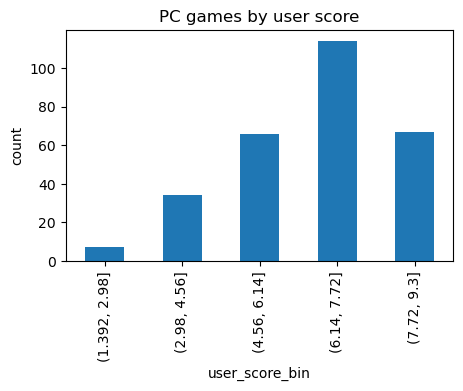

Корреляция оценок критиков и продаж по платформе PC составляет 0.0003378542859456485


In [57]:
user_scores_to_sales_corr(df_ratings, 'PC', bins_num=5, corr_method='spearman')

Распределения по платформам Xbox One и PC схожи с PS4. Корреляция между оценками критиков и продажами умеренная (около 0.5), в то время как зависимость между продажами и оценками пользователей не прослеживается.

#### Зависимость продаж от жанра

Проанализируем продажи игр в разрезе жанров.

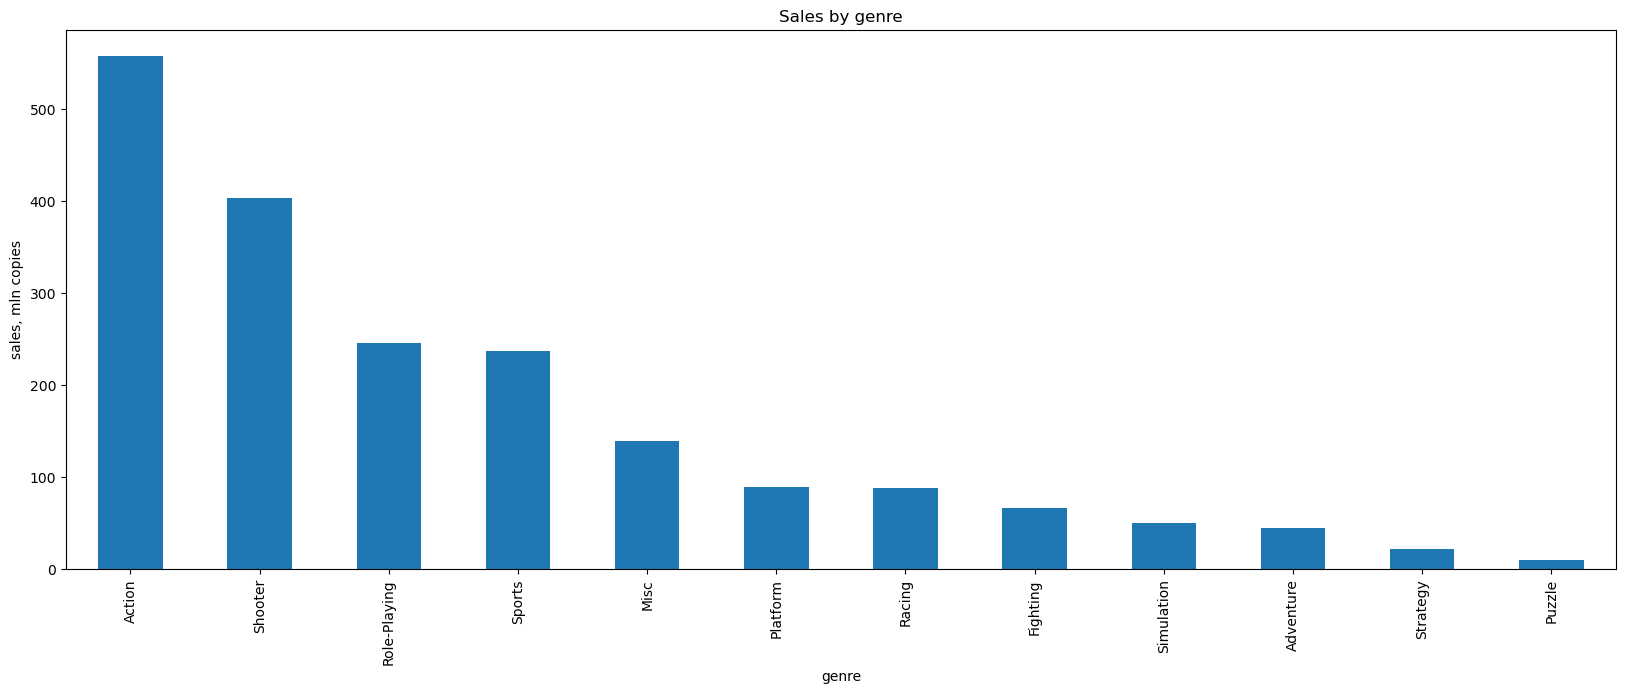

In [58]:
#построим график распределения продаж по жанрам
(df_actual
     .groupby('genre')['total_sales']
     .sum()
     .sort_values(ascending=False)
     .plot(kind='bar', figsize=(20, 7), ylabel='sales, mln copies', title='Sales by genre'));

На графике выделяются жанры с самыми большими продажами (более 400 млн копий) - шутеры и Action.

К жанрам с продажами от 200 до 300 млн копий относятся спортивные игры и RPG.

Продажи игр прочих жанров близки или ниже 150 млн копий.

Также, возможно, на большое количество проданных игр влияет то, что игр данного жанра в принципе выпускается больше. Рассчитаем медианные значения по жанрам, чтобы узнать, сколько продаж приходится на одну игру в каждом жанре.

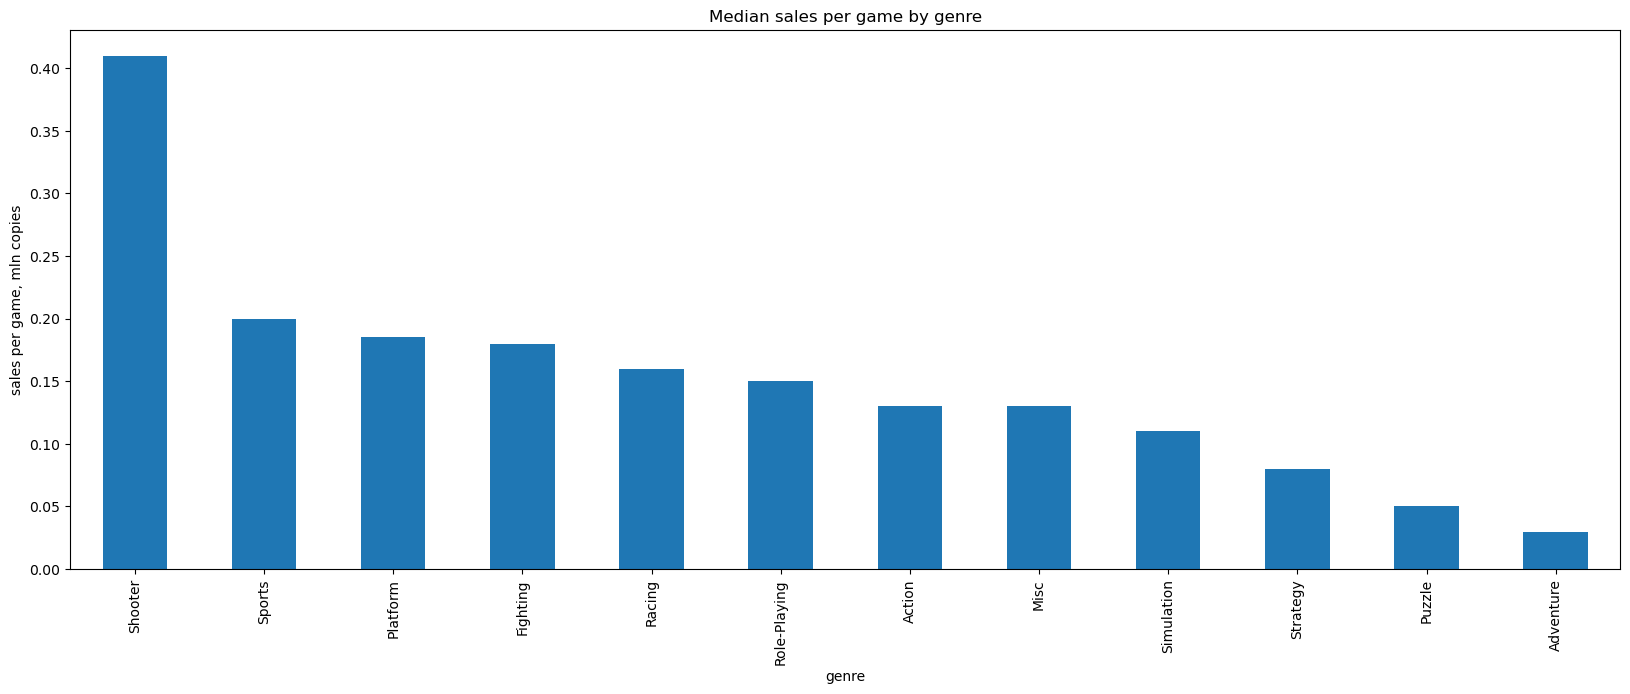

In [59]:
(df_actual
     .groupby('genre')['total_sales']
     .median()
     .sort_values(ascending=False)
     .plot(kind='bar', figsize=(20, 7), title='Median sales per game by genre', 
           ylabel='sales per game, mln copies'));

Больше всего продаж на одну игру (медиана - 0.4 млн копий) также относится к жанру шутер. По этому показателю этот жанр существенно превосходит остальные.

Медианное значение по остальным жанрам не превышает 0.2 млн копий.

### Составление портрета пользователя для различных регионов

Проанализируем продажи в различных регионах.

Определим для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5).
* Самые популярные жанры (топ-5).
* Влияет ли рейтинг ESRB на продажи в отдельном регионе.

Начнем с платформ:

Продажи по платформам


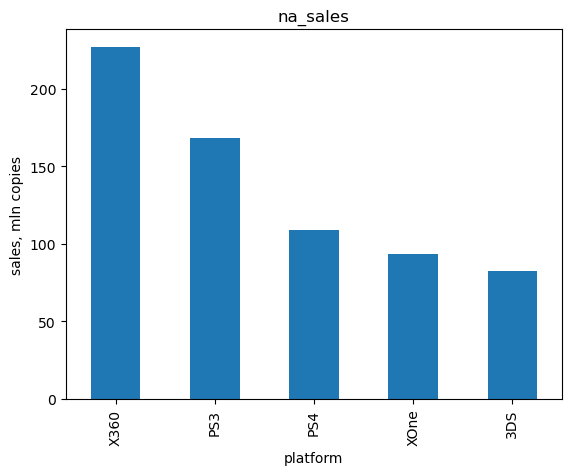

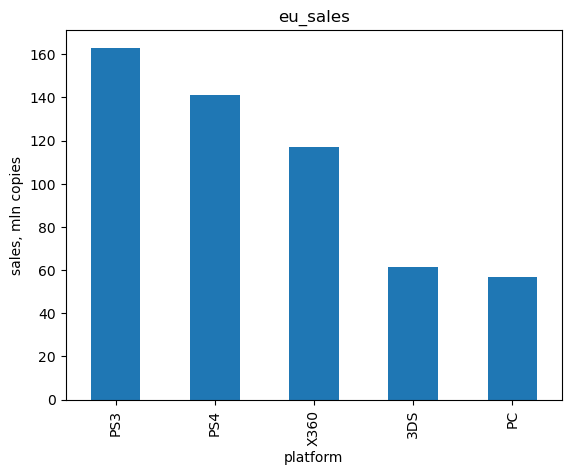

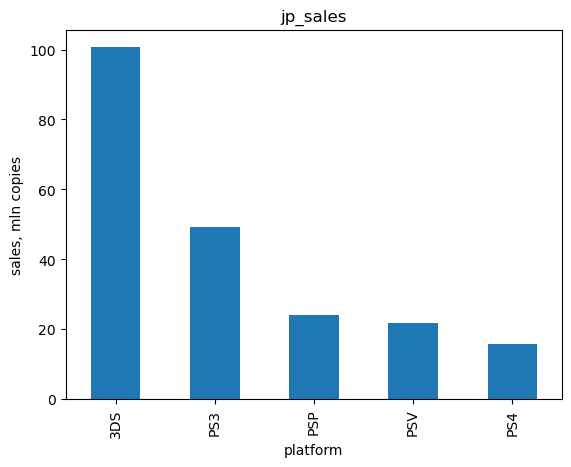

In [60]:
print('Продажи по платформам')
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    (graph = df_actual.groupby('platform')[region_sales].sum()
     .sort_values(ascending=False).head(5).plot(kind='bar',
                                                title=region_sales, ylabel='sales, mln copies'));
    plt.show(graph)

Топ-5 платформ в регионах NA и EU отличаются только одной платформой - в NA это XOne, в EU - PC.

В Японии также встречаются платформы PSP и PSV, которых нет в топе Америки и Европы, кроме того DS находится на первом месте.

___

Также проанализируем жанры:

Продажи по жанрам


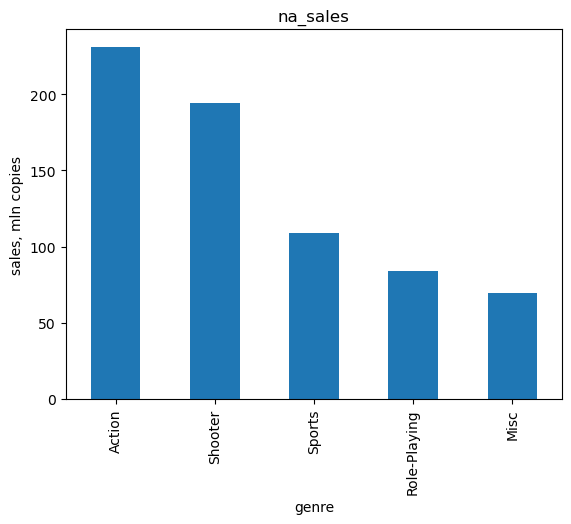

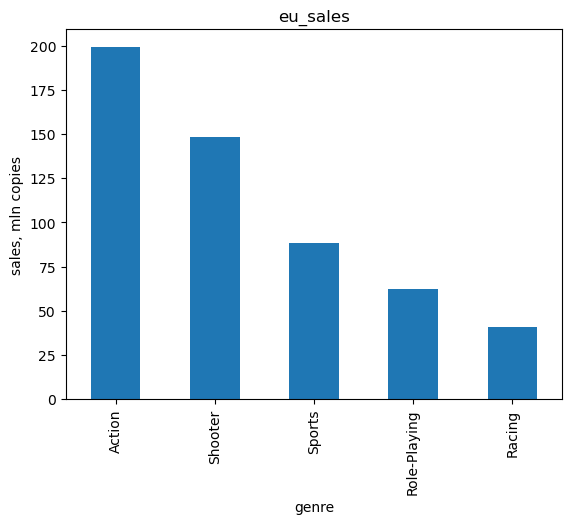

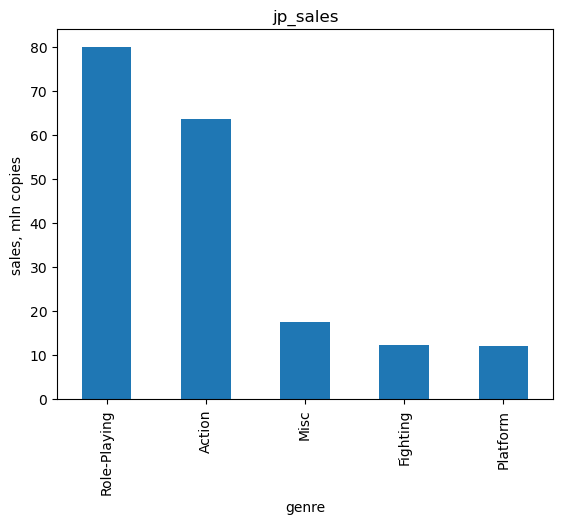

In [61]:
print('Продажи по жанрам')
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    (graph = df_actual.groupby('genre')[region_sales].sum()
            .sort_values(ascending=False).head(5).plot(kind='bar', title=region_sales,
                                                       ylabel='sales, mln copies'));
    plt.show(graph)

Различия между самыми популярными жанрами у пользователей регионов NA и EU незначительные - отличаются только 4-е по популярности жанры - Misc (прочее) и racing.

У пользователей из региона JP предпочтения в жанрах отличаются сильнее:
1. Жанр Action на 2-м месте вместо 1-го в регионах NA и EU
2. Жанр RPG находится на 1-м месте, в регионах NA и EU этот жанр находится на 4-м месте
3. Жанр шутеров не входит в топ-5 жанров

___

Проверим влияние возрастного рейтинга ESRB на продажи в различных регионах.

Построим гистограммы распределения:

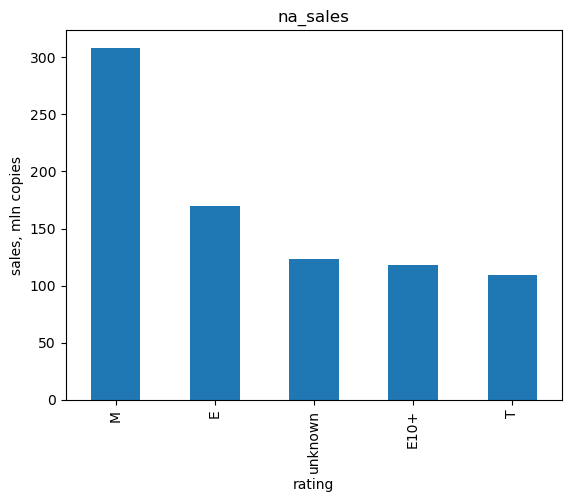

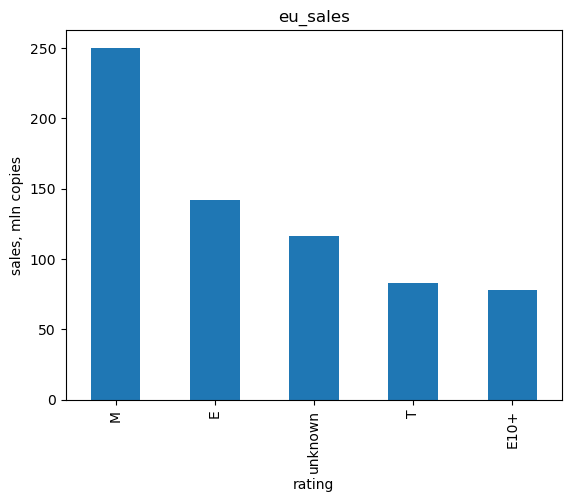

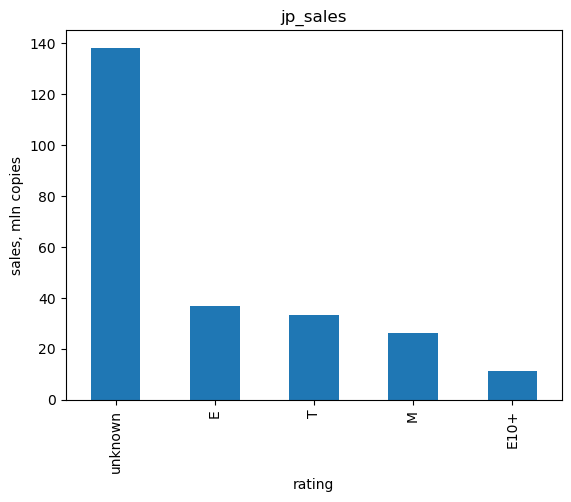

In [62]:
#построим графики для 5-и наиболее часто встречающихся значений
for region_sales in ['na_sales', 'eu_sales', 'jp_sales']:
    graph = (df_actual.groupby('rating')[region_sales].sum()
             .sort_values(ascending=False).head(5).plot(kind='bar', ylabel='sales, mln copies',
                                                        title=region_sales));
    plt.show(graph)

Приведем расшифровки значений рейтингов:

E - («Everyone») — «Для всех»
E10+ = («Everyone 10 and older») — «Для всех от 10 лет и старше»
T - («Teen») — «Подросткам»
M - («Mature») — «Для взрослых»

Для регионов NA и EU различия небольшие - самые большие продажи приходятся на игры с рейтингом M, самые низкие - E10+ и T.

Для Японии ситуация отличается.

Однако, мы видим, что большая доля продаж приходится на игры, возрастной рейтинг по которым отсутствует. Особенно ярко это проявляется в Японии. Это может быть связано с тем, что ESRB - американская ассоциация, и многие игры, которые выходят только в Японии, она не оценивает.

Для оценки влияния рейтинга на продажи также построим распределение по частоте различных оценок:

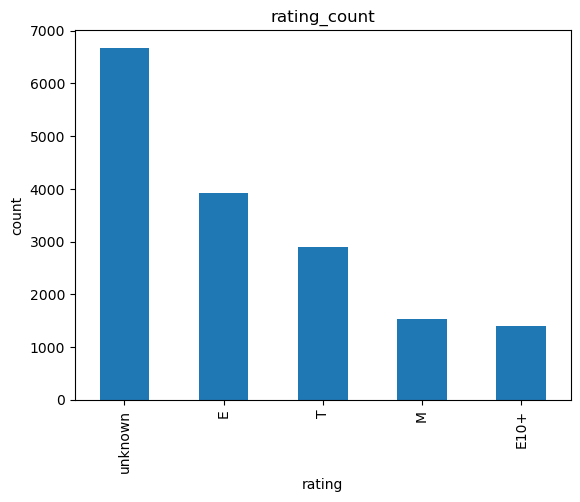

In [63]:
graph = (df.groupby('rating')['rating'].count().sort_values(ascending=False)
         .head(5).plot(kind='bar', title='rating_count', ylabel='count'));
plt.show(graph)

Мы видим, что количество игр с теми или иными оценками приблизительно совпадает с их местом в топе продаж, что говорит о том, что высокий уровень продаж игр с тем или иным рейтингом может быть обусловлен бОльшим количеством игр, которые получают данный рейтинг.

Наибольшие различия наблюдаются между регионами EU, NA (схожи между собой) и Японией.

Так, наиболее популярная платформа в Японии - 3DS, которая не является популярной в Европе и Америке.<br>
Топ-3 жанра в регионах EU и NA - шутеры, экшн и спортивные игры, в то время, как в Японии самый популярный - RPG, а шутеры не входят даже в пятерку.<br>
Существенных различий суммы продаж в зависимости от возрастного рейтинга между регионами EU и NA не выявлено. Так, самые большие продажи приходятся на игры с рейтингом M, самые низкие - E10+ и T. Для Японии ситуация отличается, однако это может быть связано с тем, что многие игры не получают рейтинг ESRB и данные могут быть непоказательны из-за их небольшого количества.

### Проверка гипотез

В данном разделе проверим следующие гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action и Sports разные.

Начнем со сравнения рейтингов платформ.

Сформулируем нулевую и альтернативную гипотезы.

Нулевую гипотезу сформулируем так, чтобы она подразумевала равенство между двумя совокупностями. Нулевая гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC равны". К данной гипотезе сформулируем альтернативную, которую мы примем, в случае если анализируемые данные не подтвердят нулевую гипотезу. Так как нас интересует отклонение как в меньшую, так и в большую сторону, гипотеза будет двусторонней. Альтернативная гипотеза: "Средние пользовательские рейтинги платформ Xbox One и PC не равны".

Для проверки гипотез проведем t-тест на равенство двух средних значений генеральных совокупностей на основе рассчитанных выборочных средних. Для этого будем использовать метод ttest_ind библиотеки SciPy.

Для определения параметра equal_var метода ttest посчитаем дисперсию значения по выборкам и оценим количество значений в них.

In [64]:
#отфильтруем датафрейм без пропущенных значений
df_ratings_all = df_actual[df_actual['user_score'] != 'unknown']
df_ratings_all['user_score'] = pd.to_numeric(df_ratings_all['user_score'])


#сформируем массивы данных по каждой из платформ, а также рассчитаем по ним среднее для проведения t-теста
xone_ratings = df_ratings_all[df_ratings_all['platform'] == 'XOne']['user_score']
pc_ratings = df_ratings_all[df_ratings_all['platform'] == 'PC']['user_score']

print('Количество позиций в выборке Xbox One', len(xone_ratings))
print('Количество позиций в выборке PC', len(pc_ratings))
print()

print('Средний рейтинг игр на XOne', xone_ratings.mean())
print('Средний рейтинг игр на PC', pc_ratings.mean())
print()

print('Дисперсия XOne', np.var(xone_ratings))
print('Дисперсия PC', np.var(pc_ratings))

Количество позиций в выборке Xbox One 182
Количество позиций в выборке PC 307

Средний рейтинг игр на XOne 6.521428571428572
Средний рейтинг игр на PC 6.451791530944625

Дисперсия XOne 1.8965188383045526
Дисперсия PC 2.5878388099608483


In [65]:
#зададим критический уровень статистической значимости
alpha = 0.05

#исходя из расчетов выше мы ожидаем, что стандартное отклонение рейтинга среди двух платформ
#будет отличаться, т. к. дисперсия данных выборок отличается, также различается количество позиций
#поэтому укажем параметру equal_var значение False
results_platforms = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)

print('p-значение:', results_platforms.pvalue)

if results_platforms.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.6130712247638477
Не получилось отвергнуть нулевую гипотезу


Так как полученное p-value выше критического уровня статистической значимости, мы не можем отвергнуть нулевую гипотезу о равенстве средних пользовательских рейтингов игр на платформах Xbox One и PC. Таким образом мы принимаем данную гипотезу и делаем вывод об их равенстве.

___

Оценим гипотезу о равенстве средних пользовательских рейтингов игр жанров Action и Sports. Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports равны".<br>
Альтернативная гипотеза "Средние пользовательские рейтинги жанров Action и Sports не равны". Данная гипотеза также является двусторонней.

Для определения параметра equal_var метода ttest посчитаем средние значения по выборкам и оценим количество значений в них.

In [66]:
#отфильтруем датафрейм без пропущенных значений
df_genres_all = df_actual[df_actual['user_score'] != 'unknown']
df_genres_all['user_score'] = pd.to_numeric(df_genres_all['user_score'])


#сформируем массивы данных по каждого из жанров, а также рассчитаем по ним среднее для проведения t-теста
action_ratings = df_genres_all[df_genres_all['genre'] == 'Action']['user_score']
sports_ratings = df_genres_all[df_genres_all['genre'] == 'Sports']['user_score']

print('Количество позиций в выборке жанра Action', len(action_ratings))
print('Количество позиций в выборке жанра Sports', len(sports_ratings))
print()

print('Средний рейтинг игр жанра Action', action_ratings.mean())
print('Средний рейтинг игр жанра Sports', sports_ratings.mean())
print()

print('Дисперсия жанра Action', np.var(action_ratings))
print('Дисперсия жанра Sports', np.var(sports_ratings))

Количество позиций в выборке жанра Action 664
Количество позиций в выборке жанра Sports 246

Средний рейтинг игр жанра Action 6.775903614457831
Средний рейтинг игр жанра Sports 5.650813008130081

Дисперсия жанра Action 1.8091482798664535
Дисперсия жанра Sports 2.87079202194461


In [67]:
#зададим критический уровень статистической значимости
alpha = 0.05

#т. к. дисперсия данных выборок отличается
#укажем параметру equal_var значение False
results_genres = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print('p-значение:', results_genres.pvalue)

if results_genres.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


p-value существенно ниже заданного критического уровня статистической значимости, что говорит о том, что вероятность получить такие средние значения по выборкам при равенстве средних значений генеральных совокупностей очень низка. 

Таким образом мы отвергаем нулевую гипотезу о равенстве оценок пользователей игр жанров Action и Sports и принимаем альтернативную гипотезу об их неравенстве.

### Вывод

Таким образом мы можем сделать вывод по обозначенным нами первоначальным гипотезам:

1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - **гипотеза подтверждена**
2. Средние пользовательские рейтинги жанров Action и Sports разные - **гипотеза подтверждена**

## Общий вывод

Мы провели исследование по анализу глобального рынка видеоигр за период с 1980 по 2016 годы для различных платформ.

Мы проанализировали влияние различных показателей на объемы продаж видеоигр.

1. Мы построили распределение продаж по годам, после чего определили 6 наиболее популярных платформ за весь период. На основе данных платформ мы рассчитали средний срок жизни платформы, который определили равным 7 годам.
2. На основе данного срока мы отфильтровали данные за 6 последних лет (с 2011 по 2016 годы) для построения прогнозов на следующий год. Мы выделили три наиболее перспективных платформы (PS4, Xbox One, PC). Также мы выявили большое значение стандартного отклонения суммы продаж в разрезе игр.
3. Проанализировали зависимость продаж игр на вышеуказанных платформах от отзывов критиков и пользователей. Корреляция между оценками критиков и продажами на всех трех платформах умеренная (около 0.5), в то время как зависимость между продажами и оценками пользователей не прослеживается.
4. Проанализировали популярность жанров за данный период на трех платформах. Жанры с самыми большими продажами (более 500 млн копий) - шутеры и Action. К жанрам с продажами от 200 до 300 млн копий относятся спортивные игры и RPG. При этом наибольшее медианное значение продаж на одну игру (более 0.4 млн копий) приходится на жанр шутер. Медианные продажи игр прочих жанров не превышают 0.2 млн копий.
5. На основе всех данных за актуальный период мы составили портреты пользователей из регионов EU, NA и JP. Наибольшие различия наблюдаются между регионами EU, NA (схожи между собой) и Японией:
 1. Наиболее популярные консоли в регионах NA и EU - X360, PS3 и PS4. В Японии - 3DS и PS3, причем у 3DS существенный отрыв от всех прочих платформ.
 2. Наиболее популярные жанры в регионах NA и EU - Action, Shooter, Sports. В Японии - Action и RPG.
 3. Наивысшие продажи в Европе и Америке приходятся на игры с возрасным рейтингом M, наименьшие - E10+ и T. В Японии E и E10+ соответственно, однако статистика по данному региону может быть искажена большим количеством непрорейтингованных игр.
6. Мы оценили гипотезы о равенстве пользовательских рейтингов различных игр и пришли к следующим выводам:
 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
 2. Средние пользовательские рейтинги жанров Action и Sports различаются